In [1]:
import pandas as pd

In [2]:
import geopandas as gpd
import fiona
from fiona.drvsupport import supported_drivers

In [3]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

In [4]:
#import KML Driver
#gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
#supported_drivers['LIBKML'] = 'rw'
fiona.drvsupport.supported_drivers['kml'] = 'rw' 
fiona.drvsupport.supported_drivers['KML'] = 'rw'

### Hospitals Data

Downloaded from: https://geoportal.hawaii.gov/datasets/hospitals-1/explore?location=20.639400%2C-157.361100%2C8.61&showTable=true

* `Description`: Locations of hospitals in the State of Hawaii as of November 2021. 
* `Source`:  State Department of Health, Office of Health Care Assurance (OHCA).
* `Lowest Geographic Scale`: Latitute, Longitude; Address
* `Data formats available`: csv, geojson, kml

```
Name:  Facility Name 
Licensed_Beds: Licensed Bed Count
Island: Island
Mailing_Address: Mailing Address
Physical_Address: Physical Address
Phone: Phone Number
Alt_Phone: Alternative Phone Number
Fax: Fax
POC: Point of Contact
Website: Website
Accred_Status: Accreditation Status* (TJC, N/A)
Cert_Status: Certification Status
Critical_Access_Hosp: Critical Access Hospital ** (Yes, No)
Provider Number: Provider Number 
```

In [12]:
# Tabular data    
data = pd.read_csv("data/hospitals/Hospitals.csv")
data.head(3)

,X,Y,objectid,name,licensed_beds,island,mailing_address,physical_address,phone,alt_phone,fax,poc,website,accred_status,cert_status,critical_access_hosp,provider_num
0,-157.757104,21.381406,1,ADVENTIST HEALTH CASTLE,160,OAHU,"640 Ulukahiki Street, Kailua, Hawaii 96734","640 Ulukahiki Street, Kailua, Hawaii 96734",(808) 263-5500,NaN,(808) 263-5123,"Kathy Raethel, President/CEO",https://www.adventisthealth.org/castle/,TJC,X,NaN,120006.0
1,-155.470496,20.076394,2,HALE HO’OLA HAMAKUA,11,HAWAII,"45-547 Plumeria Street, Honokaa, Hawaii 96727","45-547 Plumeria Street, Honokaa, Hawaii 96727",(808) 932-4100,NaN,(808) 775-9977,"David A. Culbreth, Administrator",https://www.halehoolahamakua.org/,NaN,X,X,121307.0
2,-157.810021,21.409491,3,HAWAII STATE HOSPITAL,202,OAHU,"45-710 Keaahala Road, Kaneohe, Hawaii 96744","45-710 Keaahala Road, Kaneohe, Hawaii 96744",(808) 247-2191,NaN,(808) 247-7335,"Run F. Heidelberg, DNP, APRN-RX, Administrator",https://health.hawaii.gov/,TJC,NaN,NaN,NaN


In [15]:
# geojson    

data1 = gpd.read_file("data/hospitals/Hospitals.geojson")
data1.head(3)

,objectid,name,licensed_beds,island,mailing_address,physical_address,phone,alt_phone,fax,poc,website,accred_status,cert_status,critical_access_hosp,provider_num,geometry
0,1,ADVENTIST HEALTH CASTLE,160,OAHU,"640 Ulukahiki Street, Kailua, Hawaii 96734","640 Ulukahiki Street, Kailua, Hawaii 96734",(808) 263-5500,None,(808) 263-5123,"Kathy Raethel, President/CEO",https://www.adventisthealth.org/castle/,TJC,X,None,120006.0,POINT (-157.75710 21.38141)
1,2,HALE HO’OLA HAMAKUA,11,HAWAII,"45-547 Plumeria Street, Honokaa, Hawaii 96727","45-547 Plumeria Street, Honokaa, Hawaii 96727",(808) 932-4100,None,(808) 775-9977,"David A. Culbreth, Administrator",https://www.halehoolahamakua.org/,None,X,X,121307.0,POINT (-155.47050 20.07639)
2,3,HAWAII STATE HOSPITAL,202,OAHU,"45-710 Keaahala Road, Kaneohe, Hawaii 96744","45-710 Keaahala Road, Kaneohe, Hawaii 96744",(808) 247-2191,None,(808) 247-7335,"Run F. Heidelberg, DNP, APRN-RX, Administrator",https://health.hawaii.gov/,TJC,None,None,NaN,POINT (-157.81002 21.40949)


In [19]:
#KML
data2 = gpd.read_file("data/hospitals/Hospitals.kml", driver="KML")

In [20]:
data2.head(5)

,Name,Description,geometry
0,ADVENTIST HEALTH CASTLE,,POINT (-157.75710 21.38141)
1,HALE HO’OLA HAMAKUA,,POINT (-155.47050 20.07639)
2,HAWAII STATE HOSPITAL,,POINT (-157.81002 21.40949)
3,HILO MEDICAL CENTER,,POINT (-155.11298 19.71753)
4,KAHI MOHALA,,POINT (-158.02605 21.37181)


### Adult Residential Care Homes Data

Downloaded from: https://geoportal.hawaii.gov/datasets/HiStateGIS::adult-residential-care-homes/about

* `Description`: Locations of adult residential care homes in the State of Hawaii as of November 2021. 
* `Source`:  Hawaii State Department of Health Office of Health Care Assurance (OHCA).
* `Lowest Geographic Scale`: Latitute, Longitude; Address
* `Data formats available`: csv, geojson, kml

```
Facility_Name: Facility Name
Facility_Type: Facility Type (definitions below)
Licensee: Name of License Holder
Address: Facility Address
City: City
State: State
Island: Island
Phone: Phone Number
License_Num: License Number
License_Exp: License Expiration
Males: # of male vacancies in the facility (Nov 2021)
Females: # of female vacancies in the facility (Nov 2021)
Capacity: Overall Capacity of the Facility
Amb_Type: Ambulatory Type (definitions below)
Wheelchair_Appr: Is Facility Wheelchair Approved? (Yes or no)
Diet_Type: Type of Diet Approved in Facility (Regular or Special)
```

In [21]:
# Tabular data    
data3 = pd.read_csv("data/Adult_Residential_Care_Homes/Adult_Residential_Care_Homes.csv")
data3.head(3)

,X,Y,objectid,facility_name,facility_type,licensee,address,city,state,island,phone,license_num,license_exp,males,females,capacity,amb_type,wheelchair_appr,diet_type
0,-157.864657,21.344071,1,3 J's,Type I Expanded Adult Residential Care Home,Geronimo Castillo,1624 Perry Street,Honolulu,Hawaii,Oahu,8.088487e+09,1334-C,2022/07/31 00:00:00+00,2.0,1.0,5.0,Ambulatory,Yes,Special
1,-157.947627,21.387788,2,808 Adult Residential Care Home/Expanded Care LLC,Type I Expanded Adult Residential Care Home,Novelyn Llarenas,98-209 Kanuku Street,Aiea,Hawaii,Oahu,8.087000e+09,1344-C,2022/08/31 00:00:00+00,0.0,1.0,5.0,Ambulatory,Yes,Special
2,-157.934424,21.382605,3,888 Adult Residential Care Home,Type I Expanded Adult Residential Care Home,Victor Laforteza,98-550 Kaamilo Street,Aiea,Hawaii,Oahu,8.088884e+09,1647-C,2022/03/31 00:00:00+00,NaN,NaN,5.0,NaN,No,NaN


In [22]:
#geojson

data4 = gpd.read_file("data/Adult_Residential_Care_Homes/Adult_Residential_Care_Homes.geojson")
data4.head(3)

,objectid,facility_name,facility_type,licensee,address,city,state,island,phone,license_num,license_exp,males,females,capacity,amb_type,wheelchair_appr,diet_type,geometry
0,1,3 J's,Type I Expanded Adult Residential Care Home,Geronimo Castillo,1624 Perry Street,Honolulu,Hawaii,Oahu,8.088487e+09,1334-C,2022-07-31 00:00:00+00:00,2.0,1.0,5.0,Ambulatory,Yes,Special,POINT (-157.86466 21.34407)
1,2,808 Adult Residential Care Home/Expanded Care LLC,Type I Expanded Adult Residential Care Home,Novelyn Llarenas,98-209 Kanuku Street,Aiea,Hawaii,Oahu,8.087000e+09,1344-C,2022-08-31 00:00:00+00:00,0.0,1.0,5.0,Ambulatory,Yes,Special,POINT (-157.94763 21.38779)
2,3,888 Adult Residential Care Home,Type I Expanded Adult Residential Care Home,Victor Laforteza,98-550 Kaamilo Street,Aiea,Hawaii,Oahu,8.088884e+09,1647-C,2022-03-31 00:00:00+00:00,NaN,NaN,5.0,None,No,None,POINT (-157.93442 21.38260)


In [23]:
data5 = gpd.read_file("data/Adult_Residential_Care_Homes/Adult_Residential_Care_Homes.kml", driver="KML")
data5.head(3)

,Name,Description,geometry
0,,,POINT (-157.86466 21.34407)
1,,,POINT (-157.94763 21.38779)
2,,,POINT (-157.93442 21.38260)


### Assisted Living Facilities Data

Downloaded from: https://geoportal.hawaii.gov/datasets/HiStateGIS::assisted-living-facilities/about

* `Description`: Locations of adult residential care homes in the State of Hawaii as of November 2021. 
* `Source`:  Hawaii State Department of Health Office of Health Care Assurance (OHCA).
* `Lowest Geographic Scale`: Latitute, Longitude; Address
* `Data formats available`: csv, geojson, kml

```
Facility_Name: Facility Name
Facility_Type: Facility Type (definitions below)
Licensee: Name of License Holder
Address: acility Address
City:City
State:State
Island:Island
Phone:Phone Number
License_Num:License Number
License_Exp:License Expiration
Males:# of male vacancies in the facility (Nov 2021)
Females:# of female vacancies in the facility (Nov 2021)
Capacity:Overall Capacity of the Facility
Amb_Type:Ambulatory Type (definitions below)
Wheelchair_Appr: Is Facility Wheelchair Approved? (Yes or no)
Diet_Type: Type of Diet Approved in Facility (Regular or Special)
```

In [24]:
# Tabular data    
data6 = pd.read_csv("data/assisted living facilities/Assisted_Living_Facilities.csv")
data6.head(3)

,X,Y,objectid,name,address,city,zipcode,island,phone_num,license_exp,license_num
0,-157.848743,21.323116,1,15 Craigside,15 Craigside Place,Honolulu,96817,Oahu,8085237000,2022/06/30 00:00:00+00,16-ALF
1,-157.833433,21.301697,2,Arcadia Retirement Residence,1434 Punahou Street,Honolulu,96822,Oahu,8089410941,2023/08/31 00:00:00+00,1-ALF
2,-157.716056,21.292595,3,Hawaii Kai Retirement Comm Phase I and II,428 Kawaihae Street,Honolulu,96825,Oahu,8083959599,2022/04/30 00:00:00+00,12-ALF


In [25]:
#geojson
data7 = gpd.read_file("data/assisted living facilities/Assisted_Living_Facilities.kml", driver="KML")
data7.head(3)

,Name,Description,geometry
0,15 Craigside,,POINT (-157.84874 21.32312)
1,Arcadia Retirement Residence,,POINT (-157.83343 21.30170)
2,Hawaii Kai Retirement Comm Phase I and II,,POINT (-157.71606 21.29260)


### Age of Structure Data
#### Year Structure Built

Downloaded from: https://data.census.gov/table/ACSDT5Y2019.B25034g=040XX00US15$1500000&y=2019&tid=ACSDT5Y2019.B25034

* `Description`: Year structure built 
* `Source`:  U.S. Census Bureau, 2015-2019 American Community Survey 5-Year Estimates
* `Data formats available`: csv
* `GEO_ID`: 1500000US150010201001 (FIPS code 1500000US:Country, 15:Hawaii State, 001:County, 02010:Census Track,01:Blockgroup)

```
Column Name	Label
GEO_ID	Geography
NAME	Geographic Area Name
B25034_001E	Estimate Total:
B25034_001M	Margin of Error Total:
B25034_002E	Estimate Total: Built 2014 or later
B25034_002M	Margin of Error Total: Built 2014 or later
B25034_003E	Estimate Total: Built 2010 to 2013
B25034_003M	Margin of Error Total: Built 2010 to 2013
B25034_004E	Estimate Total: Built 2000 to 2009
B25034_004M	Margin of Error Total: Built 2000 to 2009
B25034_005E	Estimate Total: Built 1990 to 1999
B25034_005M	Margin of Error Total: Built 1990 to 1999
B25034_006E	Estimate Total: Built 1980 to 1989
B25034_006M	Margin of Error Total: Built 1980 to 1989
B25034_007E	Estimate Total: Built 1970 to 1979
B25034_007M	Margin of Error Total: Built 1970 to 1979
B25034_008E	Estimate Total: Built 1960 to 1969
B25034_008M	Margin of Error Total: Built 1960 to 1969
B25034_009E	Estimate Total: Built 1950 to 1959
B25034_009M	Margin of Error Total: Built 1950 to 1959
B25034_010E	Estimate Total: Built 1940 to 1949
B25034_010M	Margin of Error Total: Built 1940 to 1949
B25034_011E	Estimate Total: Built 1939 or earlier
B25034_011M	Margin of Error Total: Built 1939 or earlier
```

In [26]:
data8 = pd.read_csv('data/age of structure/ACSDT5Y2019.B25034-Data.csv')
data8.head(4)

,GEO_ID,NAME,B25034_001E,B25034_001M,B25034_002E,B25034_002M,B25034_003E,B25034_003M,B25034_004E,B25034_004M,...,B25034_007M,B25034_008E,B25034_008M,B25034_009E,B25034_009M,B25034_010E,B25034_010M,B25034_011E,B25034_011M,Unnamed: 24
0,Geography,Geographic Area Name,Estimate!!Total:,Margin of Error!!Total:,Estimate!!Total:!!Built 2014 or later,Margin of Error!!Total:!!Built 2014 or later,Estimate!!Total:!!Built 2010 to 2013,Margin of Error!!Total:!!Built 2010 to 2013,Estimate!!Total:!!Built 2000 to 2009,Margin of Error!!Total:!!Built 2000 to 2009,...,Margin of Error!!Total:!!Built 1970 to 1979,Estimate!!Total:!!Built 1960 to 1969,Margin of Error!!Total:!!Built 1960 to 1969,Estimate!!Total:!!Built 1950 to 1959,Margin of Error!!Total:!!Built 1950 to 1959,Estimate!!Total:!!Built 1940 to 1949,Margin of Error!!Total:!!Built 1940 to 1949,Estimate!!Total:!!Built 1939 or earlier,Margin of Error!!Total:!!Built 1939 or earlier,NaN
1,1500000US150010201001,"Block Group 1, Census Tract 201, Hawaii County...",977,114,3,4,2,3,64,34,...,45,164,51,148,50,84,88,52,22,NaN
2,1500000US150010201002,"Block Group 2, Census Tract 201, Hawaii County...",454,101,4,7,0,11,99,75,...,19,8,9,12,11,64,24,94,60,NaN
3,1500000US150010201003,"Block Group 3, Census Tract 201, Hawaii County...",272,76,0,11,0,11,41,39,...,50,10,15,3,5,0,11,42,40,NaN


### Sea Level Rise Exposure Data - 1.1 Ft. Scenario

Downloaded from: https://geoportal.hawaii.gov/search?collection=Dataset&groupIds=a247b90d2fd14f60a64c0c75db5d5731

* `Description`: Estimated extent of chronic flooding due to multiple coastal hazards, modeled using a 1.1 foot sea level rise scenario. 
* `Source`:  Hawaii Statewide GIS Program Open Data Site 
* `Lowest Geographic Scale`: Multipolygon, Latitute, Longitude;
* `Data formats available`: csv, geojson, kml, shapefile

```

```

In [27]:
data9 = pd.read_csv('data/sea_level_rise_exposure/1.1ft/SLR_Exposure_Area_-_1.1_Ft._Scenario.csv')
data9.head(3)

,objectid,id,st_areashape,st_perimetershape
0,1,1,1.626753e+07,1.365255e+06
1,2,0,1.185934e+07,1.023204e+06
2,3,1,1.223127e+06,1.830724e+05


In [28]:
data10 = gpd.read_file('data/sea_level_rise_exposure/1.1ft/SLR_Exposure_Area_-_1.1_Ft._Scenario.geojson')
data10.head()

,objectid,id,st_areashape,st_perimetershape,geometry
0,1,1,1.626753e+07,1.365255e+06,"MULTIPOLYGON (((-155.34006 19.22734, -155.3401..."
1,2,0,1.185934e+07,1.023204e+06,"MULTIPOLYGON (((-159.78249 22.05861, -159.7824..."
2,3,1,1.223127e+06,1.830724e+05,"MULTIPOLYGON (((-156.93192 20.92210, -156.9322..."
3,4,0,7.960696e+06,7.450346e+05,"MULTIPOLYGON (((-156.50022 20.79772, -156.5002..."
4,5,1,3.803924e+06,4.277066e+05,"MULTIPOLYGON (((-157.14802 21.09239, -157.1480..."


In [29]:
data11 = gpd.read_file('data/sea_level_rise_exposure/1.1ft/SLR_Exposure_Area_-_1.1_Ft._Scenario.kml')
data11.head(3)

,Name,Description,geometry
0,,,"MULTIPOLYGON (((-155.34006 19.22734, -155.3401..."
1,,,"MULTIPOLYGON (((-159.78249 22.05861, -159.7824..."
2,,,"MULTIPOLYGON (((-156.93192 20.92210, -156.9322..."


<Axes: >

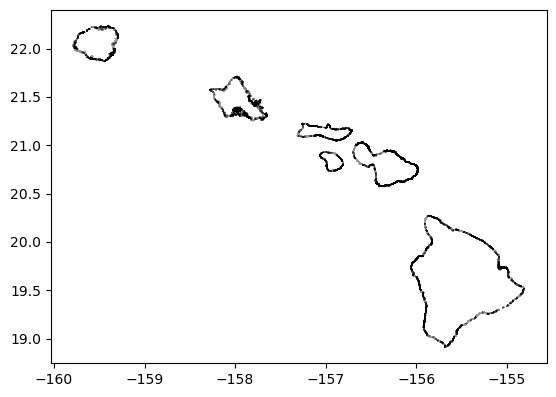

In [30]:
data12 = gpd.read_file('data/sea_level_rise_exposure/1.1ft/SLR_Exposure_Area_-_1.1_Ft._Scenario_ShapeFile')
data12.plot(alpha=.4, color='gray', edgecolor='black')

### Sea Level Rise Exposure Data - 2.0 Ft. Scenario

Downloaded from: https://geoportal.hawaii.gov/search?collection=Dataset&groupIds=a247b90d2fd14f60a64c0c75db5d5731

* `Description`: Estimated extent of chronic flooding due to multiple coastal hazards, modeled using a 2.0 foot sea level rise scenario. 
* `Source`:  Hawaii Statewide GIS Program Open Data Site 
* `Lowest Geographic Scale`: Multipolygon, Latitute, Longitude;
* `Data formats available`: csv, geojson, kml, shapefile

```

```

In [31]:
data13 = pd.read_csv('data/sea_level_rise_exposure/2.0ft/SLR_Exposure_Area_-_2.0_Ft._Scenario.csv')
data13.head(3)

,objectid,id,st_areashape,st_perimetershape
0,1,1,1.742507e+07,1.420933e+06
1,2,0,1.613553e+07,1.082830e+06
2,3,1,1.337530e+06,1.904737e+05


In [32]:
data14 = gpd.read_file('data/sea_level_rise_exposure/2.0ft/SLR_Exposure_Area_-_2.0_Ft._Scenario.geojson')
data14.head()

,objectid,id,st_areashape,st_perimetershape,geometry
0,1,1,1.742507e+07,1.420933e+06,"MULTIPOLYGON (((-155.34006 19.22734, -155.3401..."
1,2,0,1.613553e+07,1.082830e+06,"MULTIPOLYGON (((-159.78216 22.06026, -159.7821..."
2,3,1,1.337530e+06,1.904737e+05,"MULTIPOLYGON (((-156.91505 20.91916, -156.9150..."
3,4,0,9.846578e+06,8.195439e+05,"MULTIPOLYGON (((-156.50200 20.79698, -156.5020..."
4,5,1,6.620965e+06,6.483648e+05,"MULTIPOLYGON (((-157.11872 21.09841, -157.1187..."


In [33]:
data15 = gpd.read_file('data/sea_level_rise_exposure/2.0ft/SLR_Exposure_Area_-_2.0_Ft._Scenario.kml')
data15.head(3)

,Name,Description,geometry
0,,,"MULTIPOLYGON (((-155.34006 19.22734, -155.3401..."
1,,,"MULTIPOLYGON (((-159.78216 22.06026, -159.7821..."
2,,,"MULTIPOLYGON (((-156.91505 20.91916, -156.9150..."


<Axes: >

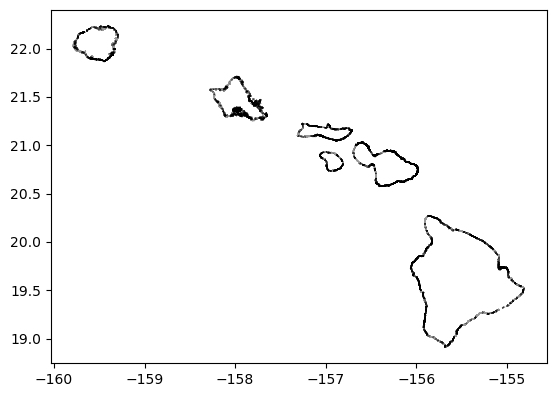

In [34]:
data16 = gpd.read_file('data/sea_level_rise_exposure/2.0ft/SLR_Exposure_Area_-_2.0_Ft._Scenario_ShapeFile')
data16.plot(alpha=.4, color='gray', edgecolor='black')

### Sea Level Rise Potential Flooded Highways Data - 1.1 Ft. Scenario

Downloaded from: https://geoportal.hawaii.gov/datasets/a3116b61d7b04cc6ba3ea10e632f991a_69/explore?location=21.472056%2C-158.059600%2C9.40

* `Description`: Estimated annual high wave flooding, modeled using a 1.1 foot sea level rise scenario. 
* `Source`:  Hawaii Statewide GIS Program Open Data Site 
* `Lowest Geographic Scale`: st fullname, Highway fullname, lengthshape, Multipolygon, Latitute, Longitude;
* `Data formats available`: csv, geojson, kml, shapefile

```

```

In [35]:
data17 = pd.read_csv('data/slr potential flooded highways/1.1ft/SLR_Potential_Flooded_Highways_-_1.1_Ft._Scenario.csv')
data17.head(3)

,objectid,fid_kau_ce,segmentid,st_fullnm,st_pre,st_name,st_type,st_suf,a1_fullnm,a1_st_pre,...,rf_addr,rt_addr,oneway,from_elev,to_elev,paved,private,geo_source,name,st_lengthshape
0,1,667,1280,KAUMUALII HWY,,KAUMUALII,HWY,,HI-50,,...,18399,18359,0,0,0,Y,N,1,KAUMUALII HWY,176.605698
1,2,674,1307,KAUMUALII HWY,,KAUMUALII,HWY,,HI-50,,...,18099,18001,0,0,0,Y,N,1,KAUMUALII HWY,234.002315
2,3,678,1311,KAUMUALII HWY,,KAUMUALII,HWY,,HI-50,,...,17999,17901,0,0,0,Y,N,1,KAUMUALII HWY,271.462677


In [36]:
data18 = gpd.read_file('data/slr potential flooded highways/1.1ft/SLR_Potential_Flooded_Highways_-_1.1_Ft._Scenario.geojson')
data18.head(3)

,objectid,fid_kau_ce,segmentid,st_fullnm,st_pre,st_name,st_type,st_suf,a1_fullnm,a1_st_pre,...,rt_addr,oneway,from_elev,to_elev,paved,private,geo_source,name,st_lengthshape,geometry
0,1,667,1280,KAUMUALII HWY,,KAUMUALII,HWY,,HI-50,,...,18359,0,0,0,Y,N,1,KAUMUALII HWY,176.605698,"MULTILINESTRING ((-159.71338 21.96639, -159.71..."
1,2,674,1307,KAUMUALII HWY,,KAUMUALII,HWY,,HI-50,,...,18001,0,0,0,Y,N,1,KAUMUALII HWY,234.002315,"LINESTRING (-159.71946 21.96874, -159.72162 21..."
2,3,678,1311,KAUMUALII HWY,,KAUMUALII,HWY,,HI-50,,...,17901,0,0,0,Y,N,1,KAUMUALII HWY,271.462677,"LINESTRING (-159.72162 21.96938, -159.72413 21..."


<Axes: >

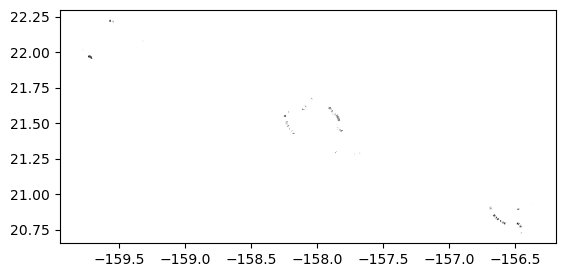

In [37]:
data19 = gpd.read_file('data/slr potential flooded highways/1.1ft/SLR_Potential_Flooded_Highways_-_1.1_Ft._Scenario')
data19.plot(alpha=1, color='black', edgecolor='black')

### Sea Level Rise Potential Flooded Highways Data - 2.0 Ft. Scenario

Downloaded from: https://geoportal.hawaii.gov/datasets/fd3ec2b57f734fe6aea7a066a81eb8b7_70/explore

* `Description`: Estimated annual high wave flooding, modeled using a 2.0 foot sea level rise scenario. 
* `Source`:  Hawaii Statewide GIS Program Open Data Site 
* `Lowest Geographic Scale`: st fullname, Highway fullname, lengthshape, Multipolygon, Latitute, Longitude;
* `Data formats available`: csv, geojson, kml, shapefile

In [38]:
data20 = pd.read_csv('data/slr potential flooded highways/2.0ft/SLR_Potential_Flooded_Highways_-_2.0_Ft._Scenario.csv')
data20.head(3)

,objectid,fid_kau_ce,segmentid,st_fullnm,st_pre,st_name,st_type,st_suf,a1_fullnm,a1_st_pre,...,rf_addr,rt_addr,oneway,from_elev,to_elev,paved,private,geo_source,name,st_lengthshape
0,1,608,2349,KUHIO HWY,,KUHIO,HWY,,HI-56,,...,,,0,0,0,Y,N,1,KUHIO HWY,381.844325
1,2,667,1280,KAUMUALII HWY,,KAUMUALII,HWY,,HI-50,,...,18399,18359,0,0,0,Y,N,1,KAUMUALII HWY,297.249397
2,3,674,1307,KAUMUALII HWY,,KAUMUALII,HWY,,HI-50,,...,18099,18001,0,0,0,Y,N,1,KAUMUALII HWY,234.002315


In [39]:
data21 = gpd.read_file('data/slr potential flooded highways/2.0ft/SLR_Potential_Flooded_Highways_-_2.0_Ft._Scenario.geojson')
data21.head(3)

,objectid,fid_kau_ce,segmentid,st_fullnm,st_pre,st_name,st_type,st_suf,a1_fullnm,a1_st_pre,...,rt_addr,oneway,from_elev,to_elev,paved,private,geo_source,name,st_lengthshape,geometry
0,1,608,2349,KUHIO HWY,,KUHIO,HWY,,HI-56,,...,,0,0,0,Y,N,1,KUHIO HWY,381.844325,"MULTILINESTRING ((-159.30674 22.09545, -159.30..."
1,2,667,1280,KAUMUALII HWY,,KAUMUALII,HWY,,HI-50,,...,18359,0,0,0,Y,N,1,KAUMUALII HWY,297.249397,"MULTILINESTRING ((-159.71291 21.96605, -159.71..."
2,3,674,1307,KAUMUALII HWY,,KAUMUALII,HWY,,HI-50,,...,18001,0,0,0,Y,N,1,KAUMUALII HWY,234.002315,"LINESTRING (-159.71946 21.96874, -159.72162 21..."


<Axes: >

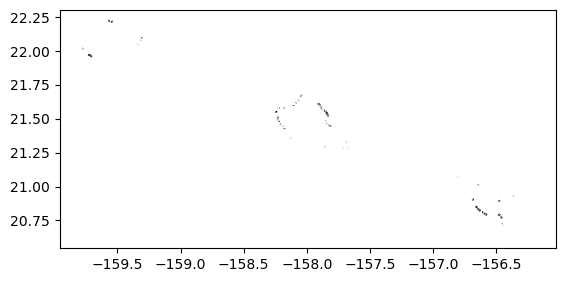

In [40]:
data22 = gpd.read_file('data/slr potential flooded highways/2.0ft/SLR_Potential_Flooded_Highways_-_2.0_Ft._Scenario')
data22.plot(alpha=1, color='black', edgecolor='black')

### Sewer Main Oahu Data

Downloaded from: https://honolulu-cchnl.opendata.arcgis.com/datasets/sewer-mains/explore?location=21.315437%2C-158.094275%2C15.00

* `Description`: Main sewer lines in Oahu updated December 19, 2023
* `Source`:  HonoluluGIS Office - HOLIS City & County of Honolulu GIS
* `Lowest Geographic Scale`: Latitute, Longitude; Address
* `Data formats available`: csv, geojson, kml,shapefile



In [41]:
data23 = pd.read_csv('data/sewer main/Sewer_-_Mains.csv')
data23.head(3)

,OBJECTID,ENABLED,SEWERID,ASSETID,BASINID,PROJECTID,STATUS,OWNER,DATEINSTALLED,DATEDIGITIZED,...,ESMT,HAZARD,MATERIAL,REHAB,DIAMETER,UPINVERT,DOWNINVERT,NEIGHBORHOOD,INSIDE_DIA,SHAPE_Length
0,1,1,458304,C-458304,SI,2296,ACT,CITY,1956/03/15 00:00:01+00,1990/09/30 00:00:00+00,...,NO,NO,VCP,NONE,8.0,125.23,107.71,Waialae-Kahala,NaN,0.000409
1,2,1,458507,C-458507,SI,2285,ACT,CITY,1956/04/01 00:00:01+00,1990/09/30 00:00:00+00,...,YES,NO,VCP,NONE,12.0,44.40,44.06,Waialae-Kahala,NaN,0.000224
2,3,1,458558,C-458558,SI,2243,ACT,CITY,1959/07/01 00:00:01+00,1990/09/30 00:00:00+00,...,YES,NO,VCP,NONE,8.0,26.50,25.42,Kuliouou-Kalani Iki,NaN,0.000751


In [42]:
data24 = gpd.read_file('data/sewer main/Sewer_-_Mains.geojson')
data24.head(3)

,OBJECTID,ENABLED,SEWERID,ASSETID,BASINID,PROJECTID,STATUS,OWNER,DATEINSTALLED,DATEDIGITIZED,...,HAZARD,MATERIAL,REHAB,DIAMETER,UPINVERT,DOWNINVERT,NEIGHBORHOOD,INSIDE_DIA,SHAPE_Length,geometry
0,1,1,458304,C-458304,SI,2296,ACT,CITY,1956-03-15 00:00:01+00:00,1990-09-30 00:00:00+00:00,...,NO,VCP,NONE,8.0,125.23,107.71,Waialae-Kahala,NaN,0.000409,"MULTILINESTRING ((-157.77784 21.28059, -157.77..."
1,2,1,458507,C-458507,SI,2285,ACT,CITY,1956-04-01 00:00:01+00:00,1990-09-30 00:00:00+00:00,...,NO,VCP,NONE,12.0,44.40,44.06,Waialae-Kahala,NaN,0.000224,"MULTILINESTRING ((-157.77931 21.27842, -157.77..."
2,3,1,458558,C-458558,SI,2243,ACT,CITY,1959-07-01 00:00:01+00:00,1990-09-30 00:00:00+00:00,...,NO,VCP,NONE,8.0,26.50,25.42,Kuliouou-Kalani Iki,NaN,0.000751,"MULTILINESTRING ((-157.78048 21.27741, -157.78..."


<Axes: >

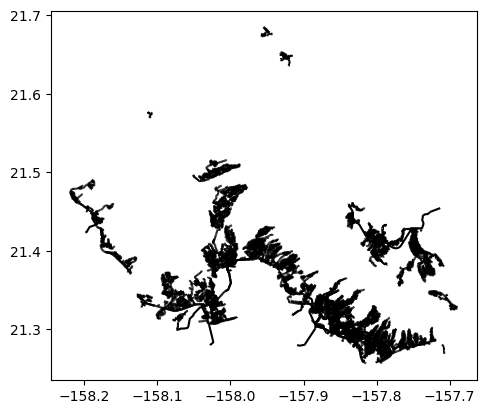

In [43]:
data25 = gpd.read_file('data/sewer main/Sewer_-_Mains')
data25.plot(alpha=1, color='black', edgecolor='black')

### Wastewater Treatment Plants Data 

Downloaded from: https://geoportal.hawaii.gov/datasets/wastewater-treatment-plants/explore?location=20.645530%2C-157.362250%2C8.00

* `Description`: Wastewater Treatment Plants as of January, 2023. 
* `Source`:  Hawaii Statewide GIS Program 
* `Lowest Geographic Scale`: Latitute, Longitude, address
* `Data formats available`: csv, geojson, kml

In [44]:
data26 = pd.read_csv('data/assisted living facilities/Assisted_Living_Facilities.csv')
data26.head(3)

,X,Y,objectid,name,address,city,zipcode,island,phone_num,license_exp,license_num
0,-157.848743,21.323116,1,15 Craigside,15 Craigside Place,Honolulu,96817,Oahu,8085237000,2022/06/30 00:00:00+00,16-ALF
1,-157.833433,21.301697,2,Arcadia Retirement Residence,1434 Punahou Street,Honolulu,96822,Oahu,8089410941,2023/08/31 00:00:00+00,1-ALF
2,-157.716056,21.292595,3,Hawaii Kai Retirement Comm Phase I and II,428 Kawaihae Street,Honolulu,96825,Oahu,8083959599,2022/04/30 00:00:00+00,12-ALF


In [45]:
data27 = gpd.read_file('data/assisted living facilities/Assisted_Living_Facilities.geojson')
data27.head(3)

,objectid,name,address,city,zipcode,island,phone_num,license_exp,license_num,geometry
0,1,15 Craigside,15 Craigside Place,Honolulu,96817,Oahu,8085237000,2022-06-30 00:00:00+00:00,16-ALF,POINT (-157.84874 21.32312)
1,2,Arcadia Retirement Residence,1434 Punahou Street,Honolulu,96822,Oahu,8089410941,2023-08-31 00:00:00+00:00,1-ALF,POINT (-157.83343 21.30170)
2,3,Hawaii Kai Retirement Comm Phase I and II,428 Kawaihae Street,Honolulu,96825,Oahu,8083959599,2022-04-30 00:00:00+00:00,12-ALF,POINT (-157.71606 21.29260)


In [46]:
data28 = gpd.read_file("data/assisted living facilities/Assisted_Living_Facilities.kml", driver="KML")
data28.head(3)

,Name,Description,geometry
0,15 Craigside,,POINT (-157.84874 21.32312)
1,Arcadia Retirement Residence,,POINT (-157.83343 21.30170)
2,Hawaii Kai Retirement Comm Phase I and II,,POINT (-157.71606 21.29260)


### Public Schools Data

Downloaded from: https://geoportal.hawaii.gov/datasets/public-schools/explore?location=20.623840%2C-157.481550%2C8.26

* `Description`: Public School locations for the main Hawaiian Islands as of July 2023.NOTE: This data layer shows the location and status of public schools BEFORE THE MAUI WILDFIRES OF AUGUST 2023. 
* `Source`:  Hawaii Statewide GIS Program
* `Lowest Geographic Scale`: Latitute, Longitude; Address
* `Data formats available`: csv, geojson, kml,shapefile

```
X: Longitude
Y: Latitude
ojbectid: Object ID
sch_code: School Code
sch_name: Name of School
address: Address
city: City
zip: Zipcode
phone: Phone Number
fax: Fax Number
Principal: Name of Principal
grade_from: Grade begins 
grade_to: Grade ends
sch_type: Elementary, Middle, High
website: Websites
complex:
complex_area:
district: District
island: Island
charter: 0 - No, 1 - Yes

```

In [68]:
data29 = gpd.read_file("data/public schools/Public_Schools.csv")
data29.head(3)

,X,Y,objectid,sch_code,sch_name,address,city,zip,phone,fax,...,grade_to,sch_type,website,complex,complex_area,district,island,charter,editdate,geometry
0,-158.000581541559,21.3931193128623,1,250,Ahrens Elementary,94-1170 Waipahu Street,Waipahu,96797,808.675.0202,808.675.0216,...,6,Elementary,http://www.augustahrens.org/,Waipahu,Pearl City-Waipahu,Leeward,Oahu,0,2023/02/02 00:00:00+00,None
1,-157.830406613347,21.4355995288096,2,335,Ahuimanu Elementary,47-470 Hui Aeko Place,Kaneohe,96744,808.239.3125,808.239.3127,...,6,Elementary,https://sites.google.com/a/ahuimanu.k12.hi.us/...,Castle,Castle-Kahuku,Windward,Oahu,0,2023/02/02 00:00:00+00,None
2,-157.928745873278,21.3760784996726,3,200,Aiea Elementary,99-370 Moanalua Road,Aiea,96701,808.305.4400,808.483.7201,...,6,Elementary,http://www.aieaelementary.com/,Aiea,Aiea Moanalua-Radford,Central,Oahu,0,2023/02/02 00:00:00+00,None


In [69]:
data30 = gpd.read_file("data/public schools/Public_Schools.geojson")
data30.head(3)

,objectid,sch_code,sch_name,address,city,zip,phone,fax,principal,grade_from,grade_to,sch_type,website,complex,complex_area,district,island,charter,editdate,geometry
0,1,250,Ahrens Elementary,94-1170 Waipahu Street,Waipahu,96797,808.675.0202,808.675.0216,Hanh Quang Nguyen,K,6,Elementary,http://www.augustahrens.org/,Waipahu,Pearl City-Waipahu,Leeward,Oahu,0,2023-02-02 00:00:00+00:00,POINT (-158.00058 21.39312)
1,2,335,Ahuimanu Elementary,47-470 Hui Aeko Place,Kaneohe,96744,808.239.3125,808.239.3127,Kimi Yuki Ikeda,K,6,Elementary,https://sites.google.com/a/ahuimanu.k12.hi.us/...,Castle,Castle-Kahuku,Windward,Oahu,0,2023-02-02 00:00:00+00:00,POINT (-157.83041 21.43560)
2,3,200,Aiea Elementary,99-370 Moanalua Road,Aiea,96701,808.305.4400,808.483.7201,James L Kau,K,6,Elementary,http://www.aieaelementary.com/,Aiea,Aiea Moanalua-Radford,Central,Oahu,0,2023-02-02 00:00:00+00:00,POINT (-157.92875 21.37608)


In [70]:
data31 = gpd.read_file("data/public schools/Public_Schools.kml", driver="KML")
data31.head(3)

,Name,Description,geometry
0,,,POINT (-158.00058 21.39312)
1,,,POINT (-157.83041 21.43560)
2,,,POINT (-157.92875 21.37608)


<Axes: >

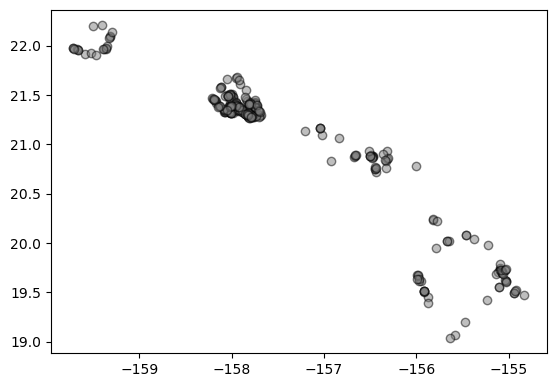

In [71]:
data32 = gpd.read_file('data/public schools/Public_Schools')
data32.plot(alpha=0.5, color='grey', edgecolor='black')

### Preschools Data

Downloaded from: https://geoportal.hawaii.gov/datasets/preschools/explore?location=20.605675%2C-157.298450%2C8.00

* `Description`: Locations of Preschools, Early Education and Early Childcare Centers in the State of Hawaii as of December 2021.
* `Source`:  Hawaii Statewide GIS Program
* `Lowest Geographic Scale`: Latitute, Longitude; Address
* `Data formats available`: csv, geojson, kml,shapefile

```
X: Longitude
Y: Latitude
ojbectid: Object ID
name: Name of School
address: Address
city: City
zip: Zipcode
island_dist: Island
type: Licensed Infant/Toddler Center, Public-private partnership, Charter, DOE
source: PATCH, EOEL

```

In [53]:
data33 = gpd.read_file("data/preschools/Preschools.csv")
data33.head(3)

,X,Y,objectid,name,address,city,zip,island_dist,type,source,geometry
0,-157.847108763973,21.3009289180106,1,Kamaaina Kids - King Street Infant/Toddler Pro...,1054 King St,Honolulu,96814,Oahu,Licensed Infant/Toddler Center,PATCH,None
1,-157.966735499865,21.3930630001492,2,Kamaaina Kids Pearl City Infant Toddler Program,784 Kamehameha Hwy,Pearl City,96782,Oahu,Licensed Infant/Toddler Center,PATCH,None
2,-157.820080696714,21.2752237039386,3,Waikiki Community Center Preschool - IT,310 Paoakalani Avenue,Honolulu,96815,Oahu,Licensed Infant/Toddler Center,PATCH,None


In [54]:
data34 = gpd.read_file("data/preschools/Preschools.geojson")
data34.head(3)

,objectid,name,address,city,zip,island_dist,type,source,geometry
0,1,Kamaaina Kids - King Street Infant/Toddler Pro...,1054 King St,Honolulu,96814,Oahu,Licensed Infant/Toddler Center,PATCH,POINT (-157.84711 21.30093)
1,2,Kamaaina Kids Pearl City Infant Toddler Program,784 Kamehameha Hwy,Pearl City,96782,Oahu,Licensed Infant/Toddler Center,PATCH,POINT (-157.96674 21.39306)
2,3,Waikiki Community Center Preschool - IT,310 Paoakalani Avenue,Honolulu,96815,Oahu,Licensed Infant/Toddler Center,PATCH,POINT (-157.82008 21.27522)


In [55]:
data35 = gpd.read_file("data/preschools/Preschools.kml", driver="KML")
data35.head(3)

,Name,Description,geometry
0,Kamaaina Kids - King Street Infant/Toddler Pro...,,POINT (-157.84711 21.30093)
1,Kamaaina Kids Pearl City Infant Toddler Program,,POINT (-157.96674 21.39306)
2,Waikiki Community Center Preschool - IT,,POINT (-157.82008 21.27522)


<Axes: >

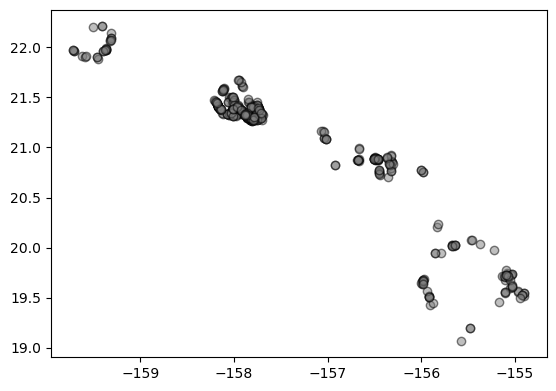

In [56]:
data36 = gpd.read_file('data/preschools/Preschools')
data36.plot(alpha=0.5, color='grey', edgecolor='black')

### Private Schools Data

Downloaded from: https://geoportal.hawaii.gov/datasets/private-schools/explore

* `Description`: Private School locations for the main Hawaiian Islands as of November 2021. 
* `Source`:  Hawaii Association of Independent Schools (HAIS).
* `Lowest Geographic Scale`: Latitute, Longitude; Address
* `Data formats available`: csv, geojson, kml,shapefile

```
X: Longitude
Y: Latitude
ojbectid: Object ID
school: Name of School
address: Address
alt_address: Alternate Address
city: City
city_dist: City District
island: Island
state: HI
zip: Zipcode
website: Website
grades: Grades starting from/to
gender: Co-ed, Girls Only, Boys Only
tuition21: Tuition per grade

```

In [57]:
data34 = gpd.read_file("data/private schools/Private_Schools.csv")
data34.head(3)

,X,Y,objectid,school,address,alt_address,city,cty_dist,island,state,zipcode,website,grades,gender,tuition21,faculty21,enrollment21,geometry
0,-158.185067325118,21.438037300676,1,Adventist Malama Elementary School,86-072 Farrington Hwy.,,Waianae,Oahu - Central/Leeward,Oahu,HI,96792,http://www.adventistmalama.org,K-8,Co-ed,Early Childhood: ; PreSchool: ; Kindergarten: ...,3,55,None
1,-157.036234730822,21.1518068003414,2,Aka'ula School,1000 Kalae Highway,,Kualapuu,Molokai,Molokai,HI,96757,www.akaula.org,5th thru 12th,Co-ed,Early Childhood: ; PreSchool: ; Kindergarten: ...,3,34,None
2,-157.917217158388,21.6148589020526,3,"Asia Pacific International School, Hawaii Campus",54-230 Kamehameha Hwy.,,Hauula,Oahu - Windward/North Shore,Oahu,HI,96717,www.apishawaii.org,K-12,Co-ed,Early Childhood: ; PreSchool: ; Kindergarten: ...,16,150,None


In [58]:
data35 = gpd.read_file("data/private schools/Private_Schools.geojson")
data35.head(3)

,objectid,school,address,alt_address,city,cty_dist,island,state,zipcode,website,grades,gender,tuition21,faculty21,enrollment21,geometry
0,1,Adventist Malama Elementary School,86-072 Farrington Hwy.,None,Waianae,Oahu - Central/Leeward,Oahu,HI,96792.0,http://www.adventistmalama.org,K-8,Co-ed,Early Childhood: ; PreSchool: ; Kindergarten: ...,3.0,55,POINT (-158.18507 21.43804)
1,2,Aka'ula School,1000 Kalae Highway,None,Kualapuu,Molokai,Molokai,HI,96757.0,www.akaula.org,5th thru 12th,Co-ed,Early Childhood: ; PreSchool: ; Kindergarten: ...,3.0,34,POINT (-157.03623 21.15181)
2,3,"Asia Pacific International School, Hawaii Campus",54-230 Kamehameha Hwy.,None,Hauula,Oahu - Windward/North Shore,Oahu,HI,96717.0,www.apishawaii.org,K-12,Co-ed,Early Childhood: ; PreSchool: ; Kindergarten: ...,16.0,150,POINT (-157.91722 21.61486)


In [59]:
data36 = gpd.read_file("data/private schools/Private_Schools.kml", driver="KML")
data36.head(3)

,Name,Description,geometry
0,,,POINT (-158.18507 21.43804)
1,,,POINT (-157.03623 21.15181)
2,,,POINT (-157.91722 21.61486)


<Axes: >

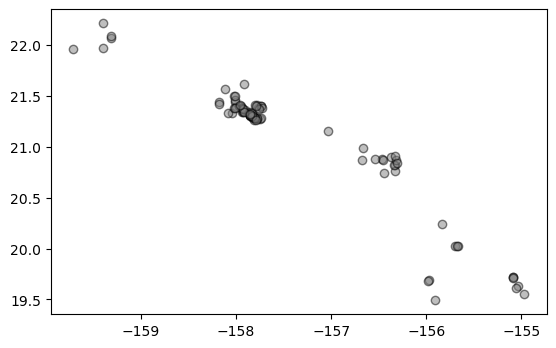

In [60]:
data37 = gpd.read_file('data/private schools/Private_Schools')
data37.plot(alpha=0.5, color='grey', edgecolor='black')

### Community Care Foster Family Homes Data

Downloaded from: https://geoportal.hawaii.gov/datasets/HiStateGIS::community-care-foster-family-homes/about

* `Description`: Community Care Foster Family Home in the State of Hawaii as of November 2021 
* `Source`:  Hawaii State Department of Health Office of Health Care Assurance (OHCA)
* `Lowest Geographic Scale`: Latitute, Longitude; Address
* `Data formats available`: csv, geojson, kml,shapefile

```
X: Longitude
Y: Latitude
ojbectid: Object ID
fname: Firstname
lname: Lastname
pyhsstreet: Street 
physical_city: City
physicalzip: Zip code
physisland: Island
mailstreet: Mail box address
mailcity: Mail Zip code
mailstate: Mail State
mailzip: Mail Zip
mailisland: Mail Island
phone: Phone number
alt_phone: Alternate phone number
cert_date: Certified date
renew_date: Renew data
numbeds: Number of beds


In [63]:
data35 = pd.read_csv("data/community Care Foster Family Homes/Community_Care_Foster_Family_Homes.csv")
data35.head(3)

,X,Y,objectid,provider_id,fname,lname,physstreet,physical_city,physstate,physicalzip,...,mailstreet,mailcity,mailstate,mailzip,mailisland,phone,alt_phone,cert_date,renew_date,numbeds
0,-158.032344,21.387534,1,1-561929,Andrea,"Abad, CNA",94-685 Kalae Street,Waipahu,HI,96797,...,94-685 Kalae Street,Waipahu,HI,96797,Oahu,(808) 671-5110,(808) 392-5324,2021/06/01 00:00:00+00,2022/05/31 00:00:00+00,2
1,-158.010101,21.394113,2,1-170054,Mayrose,"Abadilla, CNA",94-992 Kualua Place,Waipahu,HI,96797,...,94-992 Kualua Place,Waipahu,HI,96797,Oahu,(808) 772-4018,(808) 778-4730,2021/10/01 00:00:00+00,2023/09/30 00:00:00+00,3
2,-158.028229,21.355136,3,1-160007,Lani,"Abara, CNA",91-1032 Hamana Street,Ewa Beach,HI,96706,...,91-1032 Hamana Street,Ewa Beach,HI,96706,Oahu,(808) 681-3373,(808) 266-0379,2021/03/17 00:00:00+00,2023/03/16 00:00:00+00,3


In [64]:
data36 = gpd.read_file("data/community Care Foster Family Homes/Community_Care_Foster_Family_Homes.geojson")
data36.head(3)

,objectid,provider_id,fname,lname,physstreet,physical_city,physstate,physicalzip,physisland,mailstreet,mailcity,mailstate,mailzip,mailisland,phone,alt_phone,cert_date,renew_date,numbeds,geometry
0,1,1-561929,Andrea,"Abad, CNA",94-685 Kalae Street,Waipahu,HI,96797,Oahu,94-685 Kalae Street,Waipahu,HI,96797,Oahu,(808) 671-5110,(808) 392-5324,2021-06-01 00:00:00+00:00,2022-05-31 00:00:00+00:00,2,POINT (-158.03234 21.38753)
1,2,1-170054,Mayrose,"Abadilla, CNA",94-992 Kualua Place,Waipahu,HI,96797,Oahu,94-992 Kualua Place,Waipahu,HI,96797,Oahu,(808) 772-4018,(808) 778-4730,2021-10-01 00:00:00+00:00,2023-09-30 00:00:00+00:00,3,POINT (-158.01010 21.39411)
2,3,1-160007,Lani,"Abara, CNA",91-1032 Hamana Street,Ewa Beach,HI,96706,Oahu,91-1032 Hamana Street,Ewa Beach,HI,96706,Oahu,(808) 681-3373,(808) 266-0379,2021-03-17 00:00:00+00:00,2023-03-16 00:00:00+00:00,3,POINT (-158.02823 21.35514)


In [65]:
data37 = gpd.read_file("data/community Care Foster Family Homes/Community_Care_Foster_Family_Homes.kml")
data37.head(3)

,Name,Description,geometry
0,,,POINT (-158.03234 21.38753)
1,,,POINT (-158.01010 21.39411)
2,,,POINT (-158.02823 21.35514)


<Axes: >

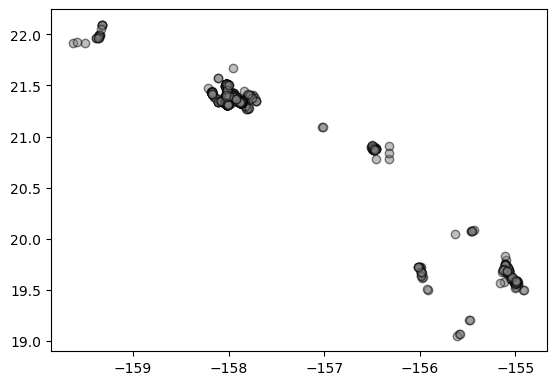

In [67]:
data38 = gpd.read_file('data/community Care Foster Family Homes/Community_Care_Foster_Family_Homes')
data38.plot(alpha=0.5, color='grey', edgecolor='black')

### Household Income Data

Downloaded from: https://data.census.gov/table/ACSDT5Y2019.B19001?t=Income%20and%20Poverty&g=040XX00US15$1500000&tid=ACSDT5Y2019.B19001

* `Description`: Household Income in the Past 12 Months (2013 - 2021)
* `Source`:  American Community Survey, US Census Bureau
* `GEO_ID`: 1500000US150010201001 (FIPS code 1500000US:Country, 15:Hawaii State, 001:County, 02010:Census Track,01:Blockgroup)
* `Data formats available`: csv
```
Column Name	Label
GEO_ID	Geography
NAME	Geographic Area Name
B19001_001E	Estimate Total
B19001_001M	Margin of Error Total
B19001_002E	Estimate Total Less than $10,000
B19001_002M	Margin of Error Total Less than $10,000
B19001_003E	Estimate!!Total!!$10,000 to $14,999
B19001_003M	Margin of Error!!Total!!$10,000 to $14,999
B19001_004E	Estimate!!Total!!$15,000 to $19,999
B19001_004M	Margin of Error!!Total!!$15,000 to $19,999
B19001_005E	Estimate!!Total!!$20,000 to $24,999
B19001_005M	Margin of Error!!Total!!$20,000 to $24,999
B19001_006E	Estimate!!Total!!$25,000 to $29,999
B19001_006M	Margin of Error!!Total!!$25,000 to $29,999
B19001_007E	Estimate!!Total!!$30,000 to $34,999
B19001_007M	Margin of Error!!Total!!$30,000 to $34,999
B19001_008E	Estimate!!Total!!$35,000 to $39,999
B19001_008M	Margin of Error!!Total!!$35,000 to $39,999
B19001_009E	Estimate!!Total!!$40,000 to $44,999
B19001_009M	Margin of Error!!Total!!$40,000 to $44,999
B19001_010E	Estimate!!Total!!$45,000 to $49,999
B19001_010M	Margin of Error!!Total!!$45,000 to $49,999
B19001_011E	Estimate!!Total!!$50,000 to $59,999
B19001_011M	Margin of Error!!Total!!$50,000 to $59,999
B19001_012E	Estimate!!Total!!$60,000 to $74,999
B19001_012M	Margin of Error!!Total!!$60,000 to $74,999
B19001_013E	Estimate!!Total!!$75,000 to $99,999
B19001_013M	Margin of Error!!Total!!$75,000 to $99,999
B19001_014E	Estimate!!Total!!$100,000 to $124,999
B19001_014M	Margin of Error!!Total!!$100,000 to $124,999
B19001_015E	Estimate!!Total!!$125,000 to $149,999
B19001_015M	Margin of Error!!Total!!$125,000 to $149,999
B19001_016E	Estimate!!Total!!$150,000 to $199,999
B19001_016M	Margin of Error!!Total!!$150,000 to $199,999
B19001_017E	Estimate!!Total!!$200,000 or more
B19001_017M	Margin of Error!!Total!!$200,000 or more
```

In [76]:
#2013 Household Income
data39 = pd.read_csv('data/household income/ACSDT5Y2013.B19001-Data.csv')
data39.head(3)

,GEO_ID,NAME,B19001_001E,B19001_001M,B19001_002E,B19001_002M,B19001_003E,B19001_003M,B19001_004E,B19001_004M,...,B19001_013M,B19001_014E,B19001_014M,B19001_015E,B19001_015M,B19001_016E,B19001_016M,B19001_017E,B19001_017M,Unnamed: 36
0,Geography,Geographic Area Name,Estimate!!Total,Margin of Error!!Total,"Estimate!!Total!!Less than $10,000","Margin of Error!!Total!!Less than $10,000","Estimate!!Total!!$10,000 to $14,999","Margin of Error!!Total!!$10,000 to $14,999","Estimate!!Total!!$15,000 to $19,999","Margin of Error!!Total!!$15,000 to $19,999",...,"Margin of Error!!Total!!$75,000 to $99,999","Estimate!!Total!!$100,000 to $124,999","Margin of Error!!Total!!$100,000 to $124,999","Estimate!!Total!!$125,000 to $149,999","Margin of Error!!Total!!$125,000 to $149,999","Estimate!!Total!!$150,000 to $199,999","Margin of Error!!Total!!$150,000 to $199,999","Estimate!!Total!!$200,000 or more","Margin of Error!!Total!!$200,000 or more",NaN
1,1500000US150010201001,"Block Group 1, Census Tract 201, Hawaii County...",761,108,153,53,78,37,35,25,...,40,44,41,33,19,9,8,3,4,NaN
2,1500000US150010201002,"Block Group 2, Census Tract 201, Hawaii County...",347,84,6,8,16,13,21,12,...,26,87,73,4,7,3,6,5,7,NaN


In [77]:
#2014 Household Income
data40 = pd.read_csv('data/household income/ACSDT5Y2014.B19001-Data.csv')
data40.head(3)

,GEO_ID,NAME,B19001_001E,B19001_001M,B19001_002E,B19001_002M,B19001_003E,B19001_003M,B19001_004E,B19001_004M,...,B19001_013M,B19001_014E,B19001_014M,B19001_015E,B19001_015M,B19001_016E,B19001_016M,B19001_017E,B19001_017M,Unnamed: 36
0,Geography,Geographic Area Name,Estimate!!Total,Margin of Error!!Total,"Estimate!!Total!!Less than $10,000","Margin of Error!!Total!!Less than $10,000","Estimate!!Total!!$10,000 to $14,999","Margin of Error!!Total!!$10,000 to $14,999","Estimate!!Total!!$15,000 to $19,999","Margin of Error!!Total!!$15,000 to $19,999",...,"Margin of Error!!Total!!$75,000 to $99,999","Estimate!!Total!!$100,000 to $124,999","Margin of Error!!Total!!$100,000 to $124,999","Estimate!!Total!!$125,000 to $149,999","Margin of Error!!Total!!$125,000 to $149,999","Estimate!!Total!!$150,000 to $199,999","Margin of Error!!Total!!$150,000 to $199,999","Estimate!!Total!!$200,000 or more","Margin of Error!!Total!!$200,000 or more",NaN
1,1500000US150010201001,"Block Group 1, Census Tract 201, Hawaii County...",677,95,109,37,78,35,28,22,...,37,45,41,35,21,11,8,3,4,NaN
2,1500000US150010201002,"Block Group 2, Census Tract 201, Hawaii County...",315,80,6,7,17,13,20,12,...,27,60,59,4,7,1,3,4,7,NaN


In [78]:
#2015 Household Income
data41 = pd.read_csv('data/household income/ACSDT5Y2015.B19001-Data.csv')
data41.head(3)

,GEO_ID,NAME,B19001_001E,B19001_001M,B19001_002E,B19001_002M,B19001_003E,B19001_003M,B19001_004E,B19001_004M,...,B19001_013M,B19001_014E,B19001_014M,B19001_015E,B19001_015M,B19001_016E,B19001_016M,B19001_017E,B19001_017M,Unnamed: 36
0,Geography,Geographic Area Name,Estimate!!Total,Margin of Error!!Total,"Estimate!!Total!!Less than $10,000","Margin of Error!!Total!!Less than $10,000","Estimate!!Total!!$10,000 to $14,999","Margin of Error!!Total!!$10,000 to $14,999","Estimate!!Total!!$15,000 to $19,999","Margin of Error!!Total!!$15,000 to $19,999",...,"Margin of Error!!Total!!$75,000 to $99,999","Estimate!!Total!!$100,000 to $124,999","Margin of Error!!Total!!$100,000 to $124,999","Estimate!!Total!!$125,000 to $149,999","Margin of Error!!Total!!$125,000 to $149,999","Estimate!!Total!!$150,000 to $199,999","Margin of Error!!Total!!$150,000 to $199,999","Estimate!!Total!!$200,000 or more","Margin of Error!!Total!!$200,000 or more",NaN
1,1500000US150010201001,"Block Group 1, Census Tract 201, Hawaii County...",645,98,89,38,75,34,16,15,...,33,71,47,32,22,8,5,6,5,NaN
2,1500000US150010201002,"Block Group 2, Census Tract 201, Hawaii County...",318,87,4,6,37,40,13,12,...,27,55,56,5,7,2,3,4,7,NaN


In [79]:
#2016 Household Income
data42 = pd.read_csv('data/household income/ACSDT5Y2016.B19001-Data.csv')
data42.head(3)

,GEO_ID,NAME,B19001_001E,B19001_001M,B19001_002E,B19001_002M,B19001_003E,B19001_003M,B19001_004E,B19001_004M,...,B19001_013M,B19001_014E,B19001_014M,B19001_015E,B19001_015M,B19001_016E,B19001_016M,B19001_017E,B19001_017M,Unnamed: 36
0,Geography,Geographic Area Name,Estimate!!Total,Margin of Error!!Total,"Estimate!!Total!!Less than $10,000","Margin of Error!!Total!!Less than $10,000","Estimate!!Total!!$10,000 to $14,999","Margin of Error!!Total!!$10,000 to $14,999","Estimate!!Total!!$15,000 to $19,999","Margin of Error!!Total!!$15,000 to $19,999",...,"Margin of Error!!Total!!$75,000 to $99,999","Estimate!!Total!!$100,000 to $124,999","Margin of Error!!Total!!$100,000 to $124,999","Estimate!!Total!!$125,000 to $149,999","Margin of Error!!Total!!$125,000 to $149,999","Estimate!!Total!!$150,000 to $199,999","Margin of Error!!Total!!$150,000 to $199,999","Estimate!!Total!!$200,000 or more","Margin of Error!!Total!!$200,000 or more",NaN
1,1500000US150010201001,"Block Group 1, Census Tract 201, Hawaii County...",651,75,83,32,65,24,22,17,...,29,72,44,16,10,23,15,6,5,NaN
2,1500000US150010201002,"Block Group 2, Census Tract 201, Hawaii County...",331,85,4,6,35,40,15,12,...,22,69,60,0,11,0,11,4,8,NaN


In [80]:
#2017 Household Income
data43 = pd.read_csv('data/household income/ACSDT5Y2017.B19001-Data.csv')
data43.head(3)

,GEO_ID,NAME,B19001_001E,B19001_001M,B19001_002E,B19001_002M,B19001_003E,B19001_003M,B19001_004E,B19001_004M,...,B19001_013M,B19001_014E,B19001_014M,B19001_015E,B19001_015M,B19001_016E,B19001_016M,B19001_017E,B19001_017M,Unnamed: 36
0,Geography,Geographic Area Name,Estimate!!Total,Margin of Error!!Total,"Estimate!!Total!!Less than $10,000","Margin of Error!!Total!!Less than $10,000","Estimate!!Total!!$10,000 to $14,999","Margin of Error!!Total!!$10,000 to $14,999","Estimate!!Total!!$15,000 to $19,999","Margin of Error!!Total!!$15,000 to $19,999",...,"Margin of Error!!Total!!$75,000 to $99,999","Estimate!!Total!!$100,000 to $124,999","Margin of Error!!Total!!$100,000 to $124,999","Estimate!!Total!!$125,000 to $149,999","Margin of Error!!Total!!$125,000 to $149,999","Estimate!!Total!!$150,000 to $199,999","Margin of Error!!Total!!$150,000 to $199,999","Estimate!!Total!!$200,000 or more","Margin of Error!!Total!!$200,000 or more",NaN
1,1500000US150010201001,"Block Group 1, Census Tract 201, Hawaii County...",705,84,63,32,94,38,25,20,...,24,61,40,16,10,41,23,17,12,NaN
2,1500000US150010201002,"Block Group 2, Census Tract 201, Hawaii County...",314,86,5,7,11,12,41,43,...,22,47,47,9,9,13,20,5,8,NaN


In [81]:
#2018 Household Income
data44 = pd.read_csv('data/household income/ACSDT5Y2018.B19001-Data.csv')
data44.head(3)

,GEO_ID,NAME,B19001_001E,B19001_001M,B19001_002E,B19001_002M,B19001_003E,B19001_003M,B19001_004E,B19001_004M,...,B19001_013M,B19001_014E,B19001_014M,B19001_015E,B19001_015M,B19001_016E,B19001_016M,B19001_017E,B19001_017M,Unnamed: 36
0,Geography,Geographic Area Name,Estimate!!Total,Margin of Error!!Total,"Estimate!!Total!!Less than $10,000","Margin of Error!!Total!!Less than $10,000","Estimate!!Total!!$10,000 to $14,999","Margin of Error!!Total!!$10,000 to $14,999","Estimate!!Total!!$15,000 to $19,999","Margin of Error!!Total!!$15,000 to $19,999",...,"Margin of Error!!Total!!$75,000 to $99,999","Estimate!!Total!!$100,000 to $124,999","Margin of Error!!Total!!$100,000 to $124,999","Estimate!!Total!!$125,000 to $149,999","Margin of Error!!Total!!$125,000 to $149,999","Estimate!!Total!!$150,000 to $199,999","Margin of Error!!Total!!$150,000 to $199,999","Estimate!!Total!!$200,000 or more","Margin of Error!!Total!!$200,000 or more",NaN
1,1500000US150010201001,"Block Group 1, Census Tract 201, Hawaii County...",760,86,61,28,90,40,16,10,...,34,69,53,35,19,43,24,33,21,NaN
2,1500000US150010201002,"Block Group 2, Census Tract 201, Hawaii County...",276,83,5,8,11,12,37,46,...,24,13,13,43,44,17,22,3,5,NaN


In [82]:
#2019 Household Income
data45 = pd.read_csv('data/household income/ACSDT5Y2019.B19001-Data.csv')
data45.head(3)

,GEO_ID,NAME,B19001_001E,B19001_001M,B19001_002E,B19001_002M,B19001_003E,B19001_003M,B19001_004E,B19001_004M,...,B19001_013M,B19001_014E,B19001_014M,B19001_015E,B19001_015M,B19001_016E,B19001_016M,B19001_017E,B19001_017M,Unnamed: 36
0,Geography,Geographic Area Name,Estimate!!Total:,Margin of Error!!Total:,"Estimate!!Total:!!Less than $10,000","Margin of Error!!Total:!!Less than $10,000","Estimate!!Total:!!$10,000 to $14,999","Margin of Error!!Total:!!$10,000 to $14,999","Estimate!!Total:!!$15,000 to $19,999","Margin of Error!!Total:!!$15,000 to $19,999",...,"Margin of Error!!Total:!!$75,000 to $99,999","Estimate!!Total:!!$100,000 to $124,999","Margin of Error!!Total:!!$100,000 to $124,999","Estimate!!Total:!!$125,000 to $149,999","Margin of Error!!Total:!!$125,000 to $149,999","Estimate!!Total:!!$150,000 to $199,999","Margin of Error!!Total:!!$150,000 to $199,999","Estimate!!Total:!!$200,000 or more","Margin of Error!!Total:!!$200,000 or more",NaN
1,1500000US150010201001,"Block Group 1, Census Tract 201, Hawaii County...",758,120,82,36,85,36,10,10,...,36,84,47,52,27,42,24,50,25,NaN
2,1500000US150010201002,"Block Group 2, Census Tract 201, Hawaii County...",332,100,43,54,14,12,38,47,...,23,15,13,10,12,51,53,9,8,NaN


In [83]:
#2020 Household Income
data46 = pd.read_csv('data/household income/ACSDT5Y2020.B19001-Data.csv')
data46.head(3)

,GEO_ID,NAME,B19001_001E,B19001_001M,B19001_002E,B19001_002M,B19001_003E,B19001_003M,B19001_004E,B19001_004M,...,B19001_013M,B19001_014E,B19001_014M,B19001_015E,B19001_015M,B19001_016E,B19001_016M,B19001_017E,B19001_017M,Unnamed: 36
0,Geography,Geographic Area Name,Estimate!!Total:,Margin of Error!!Total:,"Estimate!!Total:!!Less than $10,000","Margin of Error!!Total:!!Less than $10,000","Estimate!!Total:!!$10,000 to $14,999","Margin of Error!!Total:!!$10,000 to $14,999","Estimate!!Total:!!$15,000 to $19,999","Margin of Error!!Total:!!$15,000 to $19,999",...,"Margin of Error!!Total:!!$75,000 to $99,999","Estimate!!Total:!!$100,000 to $124,999","Margin of Error!!Total:!!$100,000 to $124,999","Estimate!!Total:!!$125,000 to $149,999","Margin of Error!!Total:!!$125,000 to $149,999","Estimate!!Total:!!$150,000 to $199,999","Margin of Error!!Total:!!$150,000 to $199,999","Estimate!!Total:!!$200,000 or more","Margin of Error!!Total:!!$200,000 or more",NaN
1,1500000US150010201001,"Block Group 1, Census Tract 201, Hawaii County...",537,101,78,33,33,25,9,8,...,34,41,32,32,29,32,29,10,17,NaN
2,1500000US150010201002,"Block Group 2, Census Tract 201, Hawaii County...",238,73,39,48,8,9,2,4,...,10,40,23,9,11,32,42,22,23,NaN


In [84]:
#2021 Household Income
data47 = pd.read_csv('data/household income/ACSDT5Y2021.B19001-Data.csv')
data47.head(3)

,GEO_ID,NAME,B19001_001E,B19001_001M,B19001_002E,B19001_002M,B19001_003E,B19001_003M,B19001_004E,B19001_004M,...,B19001_013M,B19001_014E,B19001_014M,B19001_015E,B19001_015M,B19001_016E,B19001_016M,B19001_017E,B19001_017M,Unnamed: 36
0,Geography,Geographic Area Name,Estimate!!Total:,Margin of Error!!Total:,"Estimate!!Total:!!Less than $10,000","Margin of Error!!Total:!!Less than $10,000","Estimate!!Total:!!$10,000 to $14,999","Margin of Error!!Total:!!$10,000 to $14,999","Estimate!!Total:!!$15,000 to $19,999","Margin of Error!!Total:!!$15,000 to $19,999",...,"Margin of Error!!Total:!!$75,000 to $99,999","Estimate!!Total:!!$100,000 to $124,999","Margin of Error!!Total:!!$100,000 to $124,999","Estimate!!Total:!!$125,000 to $149,999","Margin of Error!!Total:!!$125,000 to $149,999","Estimate!!Total:!!$150,000 to $199,999","Margin of Error!!Total:!!$150,000 to $199,999","Estimate!!Total:!!$200,000 or more","Margin of Error!!Total:!!$200,000 or more",NaN
1,1500000US150010201001,"Block Group 1, Census Tract 201, Hawaii County...",522,96,37,21,39,26,14,16,...,42,64,36,27,27,30,23,21,22,NaN
2,1500000US150010201002,"Block Group 2, Census Tract 201, Hawaii County...",247,72,32,41,11,10,0,12,...,11,30,21,9,8,58,38,22,23,NaN


### Aggregate Income Deficit Data

Downloaded from: https://data.census.gov/table/ACSDT5Y2019.B17011?g=040XX00US15$1500000&y=2019&tid=ACSDT5Y2019.B17011

* `Description`: Aggregate Income Deficit (Dollars) in the past 12 months for Families by Family Type, 2019
* `Source`:  American Community Survey, US Census Bureau
* `GEO_ID`: 1500000US150010201001 (FIPS code 1500000US:Country, 15:Hawaii State, 001:County, 02010:Census Track,01:Blockgroup)
* `Data formats available`: csv
```
Column Name	Label
GEO_ID	Geography
NAME	Geographic Area Name
B17011_001E	Estimate!!Aggregate income deficit in the past 12 months:
B17011_001M	Margin of Error!!Aggregate income deficit in the past 12 months:
B17011_002E	Estimate!!Aggregate income deficit in the past 12 months:!!Married-couple family
B17011_002M	Margin of Error!!Aggregate income deficit in the past 12 months:!!Married-couple family
B17011_003E	Estimate!!Aggregate income deficit in the past 12 months:!!Other family:
B17011_003M	Margin of Error!!Aggregate income deficit in the past 12 months:!!Other family:
B17011_004E	Estimate!!Aggregate income deficit in the past 12 months:!!Other family:!!Male householder, no spouse present
B17011_004M	Margin of Error!!Aggregate income deficit in the past 12 months:!!Other family:!!Male householder, no spouse present
B17011_005E	Estimate!!Aggregate income deficit in the past 12 months:!!Other family:!!Female householder, no spouse present
B17011_005M	Margin of Error!!Aggregate income deficit in the past 12 months:!!Other family:!!Female householder, no spouse present!

```

In [85]:
data48 = pd.read_csv('data/aggregate_income_deficit/ACSDT5Y2019.B17011-Data.csv')
data48.head(3)

,GEO_ID,NAME,B17011_001E,B17011_001M,B17011_002E,B17011_002M,B17011_003E,B17011_003M,B17011_004E,B17011_004M,B17011_005E,B17011_005M,Unnamed: 12
0,Geography,Geographic Area Name,Estimate!!Aggregate income deficit in the past...,Margin of Error!!Aggregate income deficit in t...,Estimate!!Aggregate income deficit in the past...,Margin of Error!!Aggregate income deficit in t...,Estimate!!Aggregate income deficit in the past...,Margin of Error!!Aggregate income deficit in t...,Estimate!!Aggregate income deficit in the past...,Margin of Error!!Aggregate income deficit in t...,Estimate!!Aggregate income deficit in the past...,Margin of Error!!Aggregate income deficit in t...,NaN
1,1500000US150010201001,"Block Group 1, Census Tract 201, Hawaii County...",785400,570725,89000,81314,696500,582055,222800,271221,473600,524887,NaN
2,1500000US150010201002,"Block Group 2, Census Tract 201, Hawaii County...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Developmental Disabilities Domiciliary Homes Data

Downloaded from: https://geoportal.hawaii.gov/datasets/HiStateGIS::developmental-disabilities-domiciliary-homes/about

* `Description`: Locations of developmental disabilities domiciliary homes in the State of Hawaii as of November 2021.
* `Source`: Hawaii State Department of Health Office of Health Care Assurance (OHCA)
* `Lowest Geographic Scale`: Latitute, Longitude; Address
* `Data formats available`: csv, geojson, kml,shapefile

```
X: Longitude
Y: Latitude
ojbectid: Object ID
facname: Facility name
street: Street 
city: City
zip: Zip code
island: Island
phone: Phone number
lic_exp: License Expiration
license_num: License Number
```

In [86]:
data49 = pd.read_csv("data/develpmental disabilities homes/Developmental_Disabilities_Domiciliary_Homes.csv")
data49.head(3)

,X,Y,objectid,facname,street,city,zip,island,phone,lic_exp,license_num
0,-157.998500,21.389419,1,Alma and Richard Pilar,94-1105 Kahuanui Street,Waipahu,96797,Oahu,8086809569,2022/02/28 00:00:00+00,89-D
1,-157.956811,21.424113,2,"Aloha Adult DD Domiciliary Home, LLC",2235 Auhuhu Street,Pearl City,96782,Oahu,8084554050,2022/07/31 00:00:00+00,83-D
2,-157.994143,21.403184,3,Aloha Care,94-983 Lumihoahu Street,Waipahu,96797,Oahu,8086716946,2022/07/31 00:00:00+00,65-D


In [87]:
data50 = gpd.read_file("data/develpmental disabilities homes/Developmental_Disabilities_Domiciliary_Homes.geojson")
data50.head(3)

,objectid,facname,street,city,zip,island,phone,lic_exp,license_num,geometry
0,1,Alma and Richard Pilar,94-1105 Kahuanui Street,Waipahu,96797,Oahu,8086809569,2022-02-28 00:00:00+00:00,89-D,POINT (-157.99850 21.38942)
1,2,"Aloha Adult DD Domiciliary Home, LLC",2235 Auhuhu Street,Pearl City,96782,Oahu,8084554050,2022-07-31 00:00:00+00:00,83-D,POINT (-157.95681 21.42411)
2,3,Aloha Care,94-983 Lumihoahu Street,Waipahu,96797,Oahu,8086716946,2022-07-31 00:00:00+00:00,65-D,POINT (-157.99414 21.40318)


<Axes: >

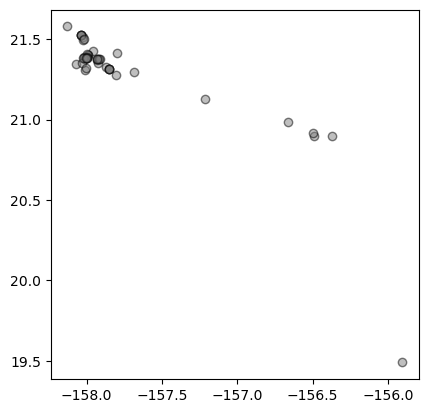

In [88]:
data51 = gpd.read_file("data/develpmental disabilities homes/Developmental_Disabilities_Domiciliary_Homes")
data51.plot(alpha=0.5, color='grey', edgecolor='black')

### Skilled Nursing Facilities Data

Downloaded from: https://geoportal.hawaii.gov/datasets/HiStateGIS::skilled-nursing-facilities/about

* `Description`: Skilled Nursing Facilities in the State of Hawaii as of November 2021.
* `Source`: Hawaii State Department of Health Office of Health Care Assurance (OHCA)
* `Lowest Geographic Scale`: Latitute, Longitude; Address
* `Data formats available`: csv, geojson, kml,shapefile

```
X: Longitude
Y: Latitude
ojbectid: Object ID
name: Facility name
licensed_beds: Number of Licensed Beds
mailing_address: Mailing Address
physical_address: Physical Address
island: Island
phone: Phone number
fax: Fax number
POC: Point of Contact
website: Website URL
cert_num: Certification number
adult_day: Adult Day Yes/
```

In [89]:
data52 = pd.read_csv("data/skilled nursing facilities/Skilled_Nursing_Facilities.csv")
data52.head(3)

,X,Y,objectid,name,licensed_beds,island,mailing_address,physical_address,phone,alt_phone,fax,poc,website,adult_day,cert_num
0,-157.848941,21.323174,1,15 CRAIGSIDE,41,OAHU,"15 Craigside Place, Honolulu, Hawaii 96817",NaN,(808) 523-7000,NaN,(888) 446-3218,"Keleka Ho’okano, Administrator; Bree Komagome,...",https://arcadia.org/15-craigside,NaN,125063.0
1,-157.797666,21.398391,2,ALOHA NURSING & REHAB CENTRE,141,OAHU,"45-545 Kamehameha Highway, Kaneohe, Hawaii 96744",NaN,(808) 247-2220,NaN,(808) 235-3676,"Amy Lee, NHA and Chief Executive Officer",https://www.alohanursing.com/,NaN,125038.0
2,-157.795144,21.414517,3,ANN PEARL NURSING FACILITY,104,OAHU,"45-181 Waikalua Road, Kaneohe, Hawaii 96744",NaN,(808) 247-8558,NaN,(808) 247-4115,"Alisa Racelo, Administrator",https://ohanapacific.com/locations/oahu/kaneoh...,Yes,125048.0


In [90]:
data53 = gpd.read_file("data/skilled nursing facilities/Skilled_Nursing_Facilities.geojson")
data53.head(3)

,objectid,name,licensed_beds,island,mailing_address,physical_address,phone,alt_phone,fax,poc,website,adult_day,cert_num,geometry
0,1,15 CRAIGSIDE,41,OAHU,"15 Craigside Place, Honolulu, Hawaii 96817",None,(808) 523-7000,None,(888) 446-3218,"Keleka Ho’okano, Administrator; Bree Komagome,...",https://arcadia.org/15-craigside,None,125063.0,POINT (-157.84894 21.32317)
1,2,ALOHA NURSING & REHAB CENTRE,141,OAHU,"45-545 Kamehameha Highway, Kaneohe, Hawaii 96744",None,(808) 247-2220,None,(808) 235-3676,"Amy Lee, NHA and Chief Executive Officer",https://www.alohanursing.com/,None,125038.0,POINT (-157.79767 21.39839)
2,3,ANN PEARL NURSING FACILITY,104,OAHU,"45-181 Waikalua Road, Kaneohe, Hawaii 96744",None,(808) 247-8558,None,(808) 247-4115,"Alisa Racelo, Administrator",https://ohanapacific.com/locations/oahu/kaneoh...,Yes,125048.0,POINT (-157.79514 21.41452)


In [91]:
data54 = gpd.read_file("data/skilled nursing facilities/Skilled_Nursing_Facilities.kml")
data54.head(3)

,Name,Description,geometry
0,15 CRAIGSIDE,,POINT (-157.84894 21.32317)
1,ALOHA NURSING & REHAB CENTRE,,POINT (-157.79767 21.39839)
2,ANN PEARL NURSING FACILITY,,POINT (-157.79514 21.41452)


<Axes: >

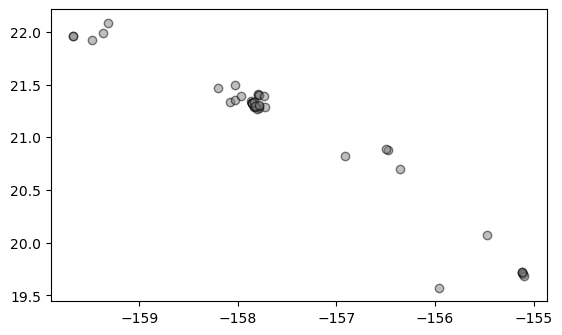

In [93]:
data54 = gpd.read_file("data/skilled nursing facilities/Skilled_Nursing_Facilities")
data54.plot(alpha=0.5, color='grey', edgecolor='black')

### Fire Station (Statewide) Data

Downloaded from: https://geoportal.hawaii.gov/datasets/hospitals-1/explore?location=20.639400%2C-157.361100%2C8.61&showTable=true

* `Description`: Locations of fire stations within the State of Hawaii, as of August, 2017 
* `Source`:  Hawaii Statewide GIS Program
* `Lowest Geographic Scale`: Latitute, Longitude; Address
* `Data formats available`: csv, geojson, kml

```
X: Latitude
Y: Longitude
objectid: Object ID
name: Fire Station Name
island: Island
```

In [96]:
data55 = pd.read_csv("data/fire stations/Fire_Stations_Statewide.csv")
data55.head(3)

,X,Y,objectid,name,island
0,-155.079486,19.683677,1,Kawailani Fire Station,Hawaii
1,-155.086191,19.720312,2,Central Fire Station,Hawaii
2,-155.661209,20.023131,3,Waimea Fire Station,Hawaii


In [97]:
data56 = gpd.read_file("data/fire stations/Fire_Stations_Statewide.geojson")
data56.head(3)

,objectid,name,island,geometry
0,1,Kawailani Fire Station,Hawaii,POINT (-155.07949 19.68368)
1,2,Central Fire Station,Hawaii,POINT (-155.08619 19.72031)
2,3,Waimea Fire Station,Hawaii,POINT (-155.66121 20.02313)


In [98]:
data57 = gpd.read_file("data/fire stations/Fire_Stations_Statewide.kml")
data57.head(3)

,Name,Description,geometry
0,Kawailani Fire Station,,POINT (-155.07949 19.68368)
1,Central Fire Station,,POINT (-155.08619 19.72031)
2,Waimea Fire Station,,POINT (-155.66121 20.02313)


<Axes: >

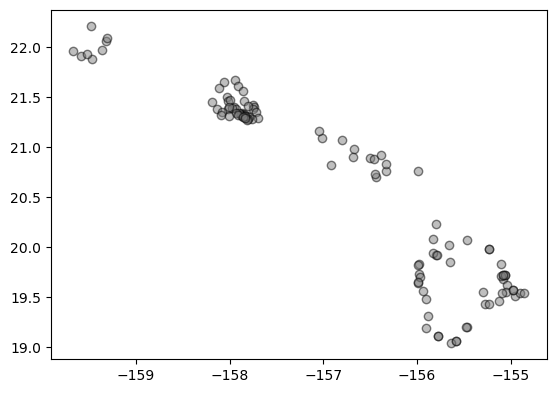

In [100]:
data58 = gpd.read_file("data/fire stations/Fire_Stations_Statewide")
data58.plot(alpha=0.5, color='grey', edgecolor='black')

### Police Station (Statewide) Data

Downloaded from: https://geoportal.hawaii.gov/datasets/HiStateGIS::police-stations-statewide/about

* `Description`: Locations of police stations within the State of Hawaii, as of August, 2017. 
* `Source`:  Hawaii Statewide GIS Program
* `Lowest Geographic Scale`: Latitute, Longitude; Address
* `Data formats available`: csv, geojson, kml, shapefile

```
X: Latitude
Y: Longitude
objectid: Object ID
name: Fire Station Name
island: Island
```

In [101]:
data59 = pd.read_csv("data/police stations/Police_Stations_Statewide.csv")
data59.head(3)

,X,Y,objectid,name,island
0,-159.354983,21.977018,1,KAUAI COUNTY POLICE DEPARTMENT,Kauai
1,-159.479153,22.212255,2,HANALEI POLICE SUBSTATION,Kauai
2,-159.667144,21.956696,3,WAIMEA POLICE SUBSTATION,Kauai


In [102]:
data60 = gpd.read_file("data/police stations/Police_Stations_Statewide.geojson")
data60.head(3)

,objectid,name,island,geometry
0,1,KAUAI COUNTY POLICE DEPARTMENT,Kauai,POINT (-159.35498 21.97702)
1,2,HANALEI POLICE SUBSTATION,Kauai,POINT (-159.47915 22.21226)
2,3,WAIMEA POLICE SUBSTATION,Kauai,POINT (-159.66714 21.95670)


In [103]:
data61 = gpd.read_file("data/police stations/Police_Stations_Statewide.kml")
data61.head(3)

,Name,Description,geometry
0,KAUAI COUNTY POLICE DEPARTMENT,,POINT (-159.35498 21.97702)
1,HANALEI POLICE SUBSTATION,,POINT (-159.47915 22.21226)
2,WAIMEA POLICE SUBSTATION,,POINT (-159.66714 21.95670)


<Axes: >

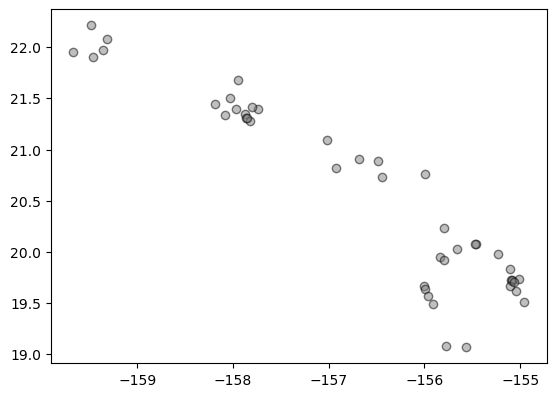

In [104]:
data62 = gpd.read_file("data/police stations/Police_Stations_Statewide")
data62.plot(alpha=0.5, color='grey', edgecolor='black')

### Roads - Honolulu County Data 

Downloaded from: https://geoportal.hawaii.gov/datasets/a3116b61d7b04cc6ba3ea10e632f991a_69/explore?location=21.472056%2C-158.059600%2C9.40

* `Description`: Roads - Honolulu County, as of May, 2021.
* `Source`:  Honolulu Land Information System (HOLIS), C&C of Honolulu, May 20, 2022 
* `Lowest Geographic Scale`: st fullname, lengthshape, zip code
* `Data formats available`: csv, geojson, kml, shapefile

```

```

In [105]:
data63 = pd.read_csv("data/roads/Roads_-_Honolulu_County.csv")
data63.head(3)

/var/folders/56/97_dwhn52nnf506_jfb1f1km0000gn/T/ipykernel_4760/1866668216.py:1: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  data63 = pd.read_csv("data/roads/Roads_-_Honolulu_County.csv")


,objectid,segmentid,fullname,predir,name,type,scll,sclh,scrl,scrh,...,felev,edittype,e911,transition,shared,built,revisedate,owner,loaddate,st_lengthshape
0,1,20982,MAKAAOA PL,,MAKAAOA,PL,7790,7796,7791,7797,...,0,,Y,,,,2003/05/21 00:00:00+00,PRIVATE,2009/05/15 00:00:00+00,38.747173
1,2,22141,6TH AVE,,6TH,AVE,1100,1198,1101,1199,...,0,,Y,,,,2003/05/21 00:00:00+00,VARIOUS,2009/05/15 00:00:00+00,199.089246
2,3,3842,MAKAIOLANI ST,,MAKAIOLANI,ST,950684,950716,950683,950715,...,0,,Y,,,,2003/05/21 00:00:00+00,CITY,2009/05/15 00:00:00+00,183.202288


In [106]:
data64 = gpd.read_file("data/roads/Roads_-_Honolulu_County.geojson")
data64.head(3)

,objectid,segmentid,fullname,predir,name,type,scll,sclh,scrl,scrh,...,edittype,e911,transition,shared,built,revisedate,owner,loaddate,st_lengthshape,geometry
0,1,20982,MAKAAOA PL,,MAKAAOA,PL,7790,7796,7791,7797,...,,Y,,,,2003-05-21 00:00:00+00:00,PRIVATE,2009-05-15 00:00:00+00:00,38.747173,"LINESTRING (-157.66903 21.29393, -157.66866 21..."
1,2,22141,6TH AVE,,6TH,AVE,1100,1198,1101,1199,...,,Y,,,,2003-05-21 00:00:00+00:00,VARIOUS,2009-05-15 00:00:00+00:00,199.089246,"LINESTRING (-157.80669 21.28456, -157.80579 21..."
2,3,3842,MAKAIOLANI ST,,MAKAIOLANI,ST,950684,950716,950683,950715,...,,Y,,,,2003-05-21 00:00:00+00:00,CITY,2009-05-15 00:00:00+00:00,183.202288,"LINESTRING (-158.00180 21.45164, -158.00183 21..."


In [107]:
data65 = gpd.read_file("data/roads/Roads_-_Honolulu_County.kml")
data65.head(3)

,Name,Description,geometry
0,MAKAAOA,,"LINESTRING (-157.66903 21.29393, -157.66866 21..."
1,6TH,,"LINESTRING (-157.80669 21.28456, -157.80579 21..."
2,MAKAIOLANI,,"LINESTRING (-158.00180 21.45164, -158.00183 21..."


<Axes: >

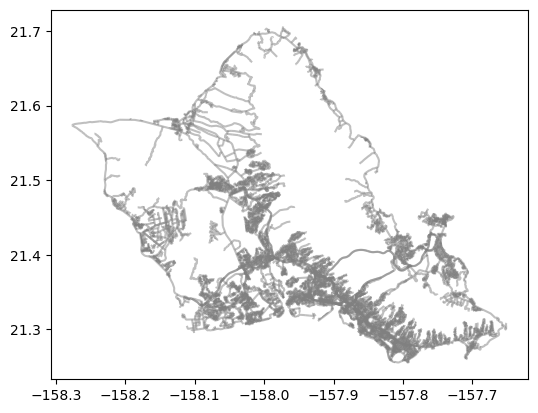

In [108]:
data66 = gpd.read_file("data/roads/Roads_-_Honolulu_County")
data66.plot(alpha=0.5, color='grey', edgecolor='black')

### Sea Level Rise Potential Economic Loss Data - 2.0 Ft. Scenario

Downloaded from: https://geoportal.hawaii.gov/datasets/a3116b61d7b04cc6ba3ea10e632f991a_69/explore?location=21.472056%2C-158.059600%2C9.40

* `Description`: Potential economic loss based on the value of the land and structures in the county tax parcel database permanently lost due to sea level rise, modeled using a 2.0 foot scenario. 
* `Source`:  Hawaii Statewide GIS Program Open Data Site 
* `Lowest Geographic Scale`: st_areashape,	st_perimetershape, latitude,longetude
* `Data formats available`: csv, geojson, kml, shapefile

```

```

In [110]:
data67 = pd.read_csv("data/slr potential economic loss/2.0ft/SLR_Potential_Economic_Loss_-_2.0_Ft._Scenario.csv")
data67.head(3)

,objectid,totloss,st_areashape,st_perimetershape
0,1,0.475461,9793.521007,395.848880
1,2,312.040037,9793.486561,395.848184
2,3,13.771542,9793.461665,395.847681


In [111]:
data68 = gpd.read_file("data/slr potential economic loss/2.0ft/SLR_Potential_Economic_Loss_-_2.0_Ft._Scenario.geojson")
data68.head(3)

,objectid,totloss,st_areashape,st_perimetershape,geometry
0,1,0.475461,9793.521007,395.848880,"POLYGON ((-155.68281 18.91070, -155.68187 18.9..."
1,2,312.040037,9793.486561,395.848184,"POLYGON ((-155.68187 18.91065, -155.68093 18.9..."
2,3,13.771542,9793.461665,395.847681,"POLYGON ((-155.68093 18.91061, -155.68000 18.9..."


In [112]:
data69 = gpd.read_file("data/slr potential economic loss/2.0ft/SLR_Potential_Economic_Loss_-_2.0_Ft._Scenario.kml")
data69.head(3)

,Name,Description,geometry
0,,,"POLYGON ((-155.68281 18.91070, -155.68187 18.9..."
1,,,"POLYGON ((-155.68187 18.91065, -155.68093 18.9..."
2,,,"POLYGON ((-155.68093 18.91061, -155.68000 18.9..."


<Axes: >

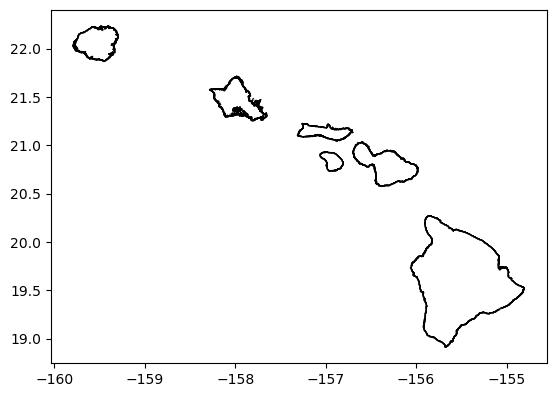

In [113]:
data70 = gpd.read_file("data/slr potential economic loss/2.0ft/SLR_Potential_Economic_Loss_-_2.0_Ft._Scenario")
data70.plot(alpha=0.5, color='grey', edgecolor='black')

### 1 Pct Coastal Flood Zone with 3.2 ft Sea Level Rise - Statewide Data 

Downloaded from: https://geoportal.hawaii.gov/datasets/HiStateGIS::1-pct-coastal-flood-zone-with-3-2-ft-sea-level-rise-statewide/about

* `Description`: Roads - Honolulu County, as of May, 2021.
* `Source`:  1 Pct Coastal Flood Zone with 3.2 ft Sea Level Rise - Statewide
* `Lowest Geographic Scale`: st_areashape,	st_perimetershape, latitude,longetude
* `Data formats available`: csv, geojson, kml, shapefile

```

```

In [116]:
data71 = pd.read_csv("data/1 Pct Coastal Flood Zone with 3.2 ft Sea Level Rise Statewide/1_Pct_Coastal_Flood_Zone_with_3.2_ft_Sea_Level_Rise_-_Statewide.csv")
data71.head(3)

,objectid,zone,st_areashape,st_perimetershape
0,1,A,2.659879e+07,1.350168e+06
1,2,CA,7.446202e+06,1.628643e+06
2,3,V,2.244608e+07,1.492215e+06


In [117]:
data72 = gpd.read_file("data/1 Pct Coastal Flood Zone with 3.2 ft Sea Level Rise Statewide/1_Pct_Coastal_Flood_Zone_with_3.2_ft_Sea_Level_Rise_-_Statewide.geojson")
data72.head(3)

,objectid,zone,st_areashape,st_perimetershape,geometry
0,1,A,2.659879e+07,1.350168e+06,"MULTIPOLYGON (((-155.59635 20.11544, -155.5962..."
1,2,CA,7.446202e+06,1.628643e+06,"MULTIPOLYGON (((-155.85425 19.96148, -155.8542..."
2,3,V,2.244608e+07,1.492215e+06,"MULTIPOLYGON (((-154.87002 19.43366, -154.8700..."


In [118]:
data73 = gpd.read_file("data/1 Pct Coastal Flood Zone with 3.2 ft Sea Level Rise Statewide/1_Pct_Coastal_Flood_Zone_with_3.2_ft_Sea_Level_Rise_-_Statewide.kml")
data73.head(3)

,Name,Description,geometry
0,,,"MULTIPOLYGON (((-155.59635 20.11544, -155.5962..."
1,,,"MULTIPOLYGON (((-155.85425 19.96148, -155.8542..."
2,,,"MULTIPOLYGON (((-154.87002 19.43366, -154.8700..."


<Axes: >

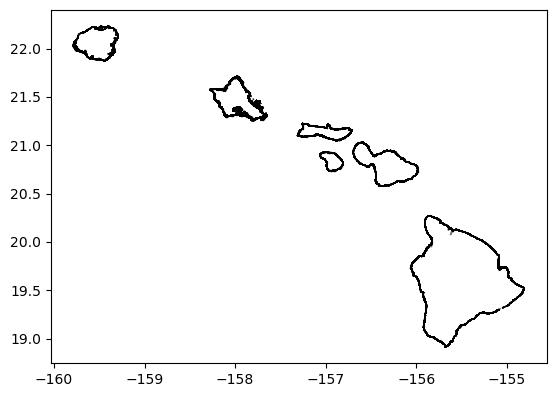

In [119]:
data74 = gpd.read_file("data/1 Pct Coastal Flood Zone with 3.2 ft Sea Level Rise Statewide/1_Pct_Coastal_Flood_Zone_with_3.2_ft_Sea_Level_Rise_-_Statewide")
data74.plot(alpha=0.5, color='grey', edgecolor='black')

### On-site Sewage Disposal Systems - Oahu

Downloaded from: https://geoportal.hawaii.gov/datasets/3d638ed89da245949de574c02b5dc911_22/explore

* `Description`: On-site Sewage Disposal Systems for the island of Oahu, as of 2008.
* `Source`:  State of Hawaii Department of Health, May, 2017.
* `Lowest Geographic Scale`: latitude,longetude
* `Data formats available`: csv, geojson, kml, shapefile

```

```

In [120]:
data75 = pd.read_csv("data/onsite sewage disposal systems/On-site_Sewage_Disposal_Systems_-_Oahu.csv")
data75.head(3)

,objectid,fid_1,acres,tmk8_num,tmk8_alph,tmk_9,type,osds_class,x,y,...,cp_fc,cp_eff,cp_nflx,cp_pflx,ttl_osds,ttl_eff,ttl_n,ttl_p,rsk_score,towns
0,1,4740,0.40,49007025,49007025,149007025,CESSPOOL,Class IV,620359,2381670,...,1000000,800,0.184710,0.051480,1,800,0.1847,0.0515,3,KAHALUU
1,2,4790,0.22,49007023,49007023,149007023,CESSPOOL,Class IV,620401,2381580,...,1000000,600,0.138530,0.038610,1,600,0.1385,0.0386,5,KAHALUU
2,3,4791,0.17,49007022,49007022,149007022,CESSPOOL,Class IV,620424,2381520,...,1000000,1000,0.230890,0.064350,1,1000,0.2309,0.0643,4,KAHALUU


In [121]:
data76 = gpd.read_file("data/onsite sewage disposal systems/On-site_Sewage_Disposal_Systems_-_Oahu.geojson")
data76.head(3)

,objectid,fid_1,acres,tmk8_num,tmk8_alph,tmk_9,type,osds_class,x,y,...,cp_eff,cp_nflx,cp_pflx,ttl_osds,ttl_eff,ttl_n,ttl_p,rsk_score,towns,geometry
0,1,4740,0.40,49007025,49007025,149007025,CESSPOOL,Class IV,620359,2381670,...,800,0.184710,0.051480,1,800,0.1847,0.0515,3,KAHALUU,POINT (-157.83778 21.53377)
1,2,4790,0.22,49007023,49007023,149007023,CESSPOOL,Class IV,620401,2381580,...,600,0.138530,0.038610,1,600,0.1385,0.0386,5,KAHALUU,POINT (-157.83738 21.53296)
2,3,4791,0.17,49007022,49007022,149007022,CESSPOOL,Class IV,620424,2381520,...,1000,0.230890,0.064350,1,1000,0.2309,0.0643,4,KAHALUU,POINT (-157.83717 21.53241)


In [122]:
data77 = gpd.read_file("data/onsite sewage disposal systems/On-site_Sewage_Disposal_Systems_-_Oahu.kml")
data77.head(3)

,Name,Description,geometry
0,,,POINT (-157.83778 21.53377)
1,,,POINT (-157.83738 21.53296)
2,,,POINT (-157.83717 21.53241)


<Axes: >

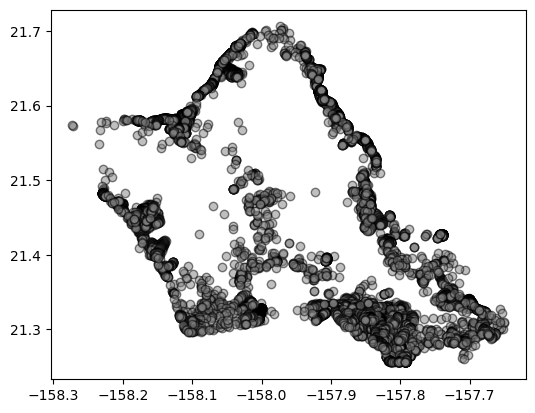

In [123]:
data78 = gpd.read_file("data/onsite sewage disposal systems/On-site_Sewage_Disposal_Systems_-_Oahu")
data78.plot(alpha=0.5, color='grey', edgecolor='black')

### ALICE

Downloaded from: https://www.unitedforalice.org/county-profiles/hawaii

* `Description`: American Community Survey estimates: data for counties with populations over 65,000 are 1-year estimates; for populations between 20,000 and 65,000, data are 3-year estimates; and for populations below 20,000, data are 5-year estimates.
* `Source`:  Swww.UnitedForALICE.org
* `Lowest Geographic Scale`: GEO.id2, county
* `Data formats available`: csv

```
Households:	Total number of households reporting income
Poverty Households:	Number of households in Poverty
ALICE Households:	Number of households ALICE
Above ALICE Households:	Number of households above the ALICE Threshold
ALICE Threshold - HH 65 years and over	ALICE Threshold for households headed by someone 65 years and over
ALICE Threshold - HH under 65	ALICE Threshold for households headed by someone under 65 years
Households:	Total number of households reporting income
Poverty Households:	Number of households in Poverty
ALICE Households:	Number of households ALICE


```

In [5]:
data79 = pd.read_csv("data/Alice/county.csv")
data79.head(3)

,Year,GEO.id2,GEO.display_label,County,State,State Abbr,Households,Poverty Households,ALICE Households,Above ALICE Households,ALICE Threshold - HH under 65,ALICE Threshold - HH 65 years and over,Source: American Community Survey
0,2010,15001,"Hawaii County, Hawaii",Hawaii,Hawaii,HI,"62,584","12,478","18,773","31,333","$50,000","$40,000",1-Year
1,2012,15001,"Hawaii County, Hawaii",Hawaii,Hawaii,HI,"64,925","12,663","22,954","29,308","$60,000","$45,000",1-Year
2,2014,15001,"Hawaii County, Hawaii",Hawaii,Hawaii,HI,"65,178","11,424","22,550","31,204","$60,000","$45,000",1-Year


In [6]:
data80 = pd.read_csv("data/Alice/subcounty,places,zipcodes.csv")
data80.head(3)

,Geography type,Year,US_States,GEO.id2,GEO.display_label,Households,Poverty Households,ALICE Households,Above ALICE Households,Source: American Community Survey
0,Sub_County,2021,Hawaii,1500190630,"Hilo CCD, Hawaii County, Hawaii",16776,2773,4920,9083,5-Year
1,Sub_County,2021,Hawaii,1500190720,"Honokaa-Kukuihaele CCD, Hawaii County, Hawaii",1199,95,529,575,5-Year
2,Sub_County,2021,Hawaii,1500191170,"Kau CCD, Hawaii County, Hawaii",3335,842,1448,1045,5-Year


### TYPES OF HEALTH INSURANCE COVERAGE BY AGE Data

Downloaded from: https://data.census.gov/table/ACSDT5Y2019.B27010?t=Health%20Insurance&g=050XX00US15003$1500000&y=2019&tid=ACSDT5Y2019.B27010

* `Description`: Beginning in 2017, selected variable categories were updated, including age-categories, income-to-poverty ratio (IPR) categories, and the age universe for certain employment and education variables.
* `Source`:  American Community Survey, US Census Bureau
* `Lowest Geographic Scale`: GEO_id, county
* `Data formats available`: csv

```
Column Name	Label
GEO_ID	Geography
NAME	Geographic Area Name
B27010_001E	Estimate!!Total:
B27010_001M	Margin of Error!!Total:
B27010_002E	Estimate!!Total:!!Under 19 years:
B27010_002M	Margin of Error!!Total:!!Under 19 years:
B27010_003E	Estimate!!Total:!!Under 19 years:!!With one type of health insurance coverage:
B27010_003M	Margin of Error!!Total:!!Under 19 years:!!With one type of health insurance coverage:
B27010_004E	Estimate!!Total:!!Under 19 years:!!With one type of health insurance coverage:!!With employer-based health insurance only
B27010_004M	Margin of Error!!Total:!!Under 19 years:!!With one type of health insurance coverage:!!With employer-based health insurance only
B27010_005E	Estimate!!Total:!!Under 19 years:!!With one type of health insurance coverage:!!With direct-purchase health insurance only
B27010_005M	Margin of Error!!Total:!!Under 19 years:!!With one type of health insurance coverage:!!With direct-purchase health insurance only
B27010_006E	Estimate!!Total:!!Under 19 years:!!With one type of health insurance coverage:!!With Medicare coverage only
B27010_006M	Margin of Error!!Total:!!Under 19 years:!!With one type of health insurance coverage:!!With Medicare coverage only
B27010_007E	Estimate!!Total:!!Under 19 years:!!With one type of health insurance coverage:!!With Medicaid/means-tested public coverage only
B27010_007M	Margin of Error!!Total:!!Under 19 years:!!With one type of health insurance coverage:!!With Medicaid/means-tested public coverage only
B27010_008E	Estimate!!Total:!!Under 19 years:!!With one type of health insurance coverage:!!With TRICARE/military health coverage only
B27010_008M	Margin of Error!!Total:!!Under 19 years:!!With one type of health insurance coverage:!!With TRICARE/military health coverage only
B27010_009E	Estimate!!Total:!!Under 19 years:!!With one type of health insurance coverage:!!With VA Health Care only
B27010_009M	Margin of Error!!Total:!!Under 19 years:!!With one type of health insurance coverage:!!With VA Health Care only
B27010_010E	Estimate!!Total:!!Under 19 years:!!With two or more types of health insurance coverage:
B27010_010M	Margin of Error!!Total:!!Under 19 years:!!With two or more types of health insurance coverage:
B27010_011E	Estimate!!Total:!!Under 19 years:!!With two or more types of health insurance coverage:!!With employer-based and direct-purchase coverage
B27010_011M	Margin of Error!!Total:!!Under 19 years:!!With two or more types of health insurance coverage:!!With employer-based and direct-purchase coverage
B27010_012E	Estimate!!Total:!!Under 19 years:!!With two or more types of health insurance coverage:!!With employer-based and Medicare coverage
B27010_012M	Margin of Error!!Total:!!Under 19 years:!!With two or more types of health insurance coverage:!!With employer-based and Medicare coverage
B27010_013E	Estimate!!Total:!!Under 19 years:!!With two or more types of health insurance coverage:!!With Medicare and Medicaid/means-tested public coverage
B27010_013M	Margin of Error!!Total:!!Under 19 years:!!With two or more types of health insurance coverage:!!With Medicare and Medicaid/means-tested public coverage
B27010_014E	Estimate!!Total:!!Under 19 years:!!With two or more types of health insurance coverage:!!Other private only combinations
B27010_014M	Margin of Error!!Total:!!Under 19 years:!!With two or more types of health insurance coverage:!!Other private only combinations
B27010_015E	Estimate!!Total:!!Under 19 years:!!With two or more types of health insurance coverage:!!Other public only combinations
B27010_015M	Margin of Error!!Total:!!Under 19 years:!!With two or more types of health insurance coverage:!!Other public only combinations
B27010_016E	Estimate!!Total:!!Under 19 years:!!With two or more types of health insurance coverage:!!Other coverage combinations
B27010_016M	Margin of Error!!Total:!!Under 19 years:!!With two or more types of health insurance coverage:!!Other coverage combinations
B27010_017E	Estimate!!Total:!!Under 19 years:!!No health insurance coverage
B27010_017M	Margin of Error!!Total:!!Under 19 years:!!No health insurance coverage
B27010_018E	Estimate!!Total:!!19 to 34 years:
B27010_018M	Margin of Error!!Total:!!19 to 34 years:
B27010_019E	Estimate!!Total:!!19 to 34 years:!!With one type of health insurance coverage:
B27010_019M	Margin of Error!!Total:!!19 to 34 years:!!With one type of health insurance coverage:
B27010_020E	Estimate!!Total:!!19 to 34 years:!!With one type of health insurance coverage:!!With employer-based health insurance only
B27010_020M	Margin of Error!!Total:!!19 to 34 years:!!With one type of health insurance coverage:!!With employer-based health insurance only
B27010_021E	Estimate!!Total:!!19 to 34 years:!!With one type of health insurance coverage:!!With direct-purchase health insurance only
B27010_021M	Margin of Error!!Total:!!19 to 34 years:!!With one type of health insurance coverage:!!With direct-purchase health insurance only
B27010_022E	Estimate!!Total:!!19 to 34 years:!!With one type of health insurance coverage:!!With Medicare coverage only
B27010_022M	Margin of Error!!Total:!!19 to 34 years:!!With one type of health insurance coverage:!!With Medicare coverage only
B27010_023E	Estimate!!Total:!!19 to 34 years:!!With one type of health insurance coverage:!!With Medicaid/means-tested public coverage only
B27010_023M	Margin of Error!!Total:!!19 to 34 years:!!With one type of health insurance coverage:!!With Medicaid/means-tested public coverage only
B27010_024E	Estimate!!Total:!!19 to 34 years:!!With one type of health insurance coverage:!!With TRICARE/military health coverage only
B27010_024M	Margin of Error!!Total:!!19 to 34 years:!!With one type of health insurance coverage:!!With TRICARE/military health coverage only
B27010_025E	Estimate!!Total:!!19 to 34 years:!!With one type of health insurance coverage:!!With VA Health Care only
B27010_025M	Margin of Error!!Total:!!19 to 34 years:!!With one type of health insurance coverage:!!With VA Health Care only
B27010_026E	Estimate!!Total:!!19 to 34 years:!!With two or more types of health insurance coverage:
B27010_026M	Margin of Error!!Total:!!19 to 34 years:!!With two or more types of health insurance coverage:
B27010_027E	Estimate!!Total:!!19 to 34 years:!!With two or more types of health insurance coverage:!!With employer-based and direct-purchase coverage
B27010_027M	Margin of Error!!Total:!!19 to 34 years:!!With two or more types of health insurance coverage:!!With employer-based and direct-purchase coverage
B27010_028E	Estimate!!Total:!!19 to 34 years:!!With two or more types of health insurance coverage:!!With employer-based and Medicare coverage
B27010_028M	Margin of Error!!Total:!!19 to 34 years:!!With two or more types of health insurance coverage:!!With employer-based and Medicare coverage
B27010_029E	Estimate!!Total:!!19 to 34 years:!!With two or more types of health insurance coverage:!!With Medicare and Medicaid/means-tested public coverage
B27010_029M	Margin of Error!!Total:!!19 to 34 years:!!With two or more types of health insurance coverage:!!With Medicare and Medicaid/means-tested public coverage
B27010_030E	Estimate!!Total:!!19 to 34 years:!!With two or more types of health insurance coverage:!!Other private only combinations
B27010_030M	Margin of Error!!Total:!!19 to 34 years:!!With two or more types of health insurance coverage:!!Other private only combinations
B27010_031E	Estimate!!Total:!!19 to 34 years:!!With two or more types of health insurance coverage:!!Other public only combinations
B27010_031M	Margin of Error!!Total:!!19 to 34 years:!!With two or more types of health insurance coverage:!!Other public only combinations
B27010_032E	Estimate!!Total:!!19 to 34 years:!!With two or more types of health insurance coverage:!!Other coverage combinations
B27010_032M	Margin of Error!!Total:!!19 to 34 years:!!With two or more types of health insurance coverage:!!Other coverage combinations
B27010_033E	Estimate!!Total:!!19 to 34 years:!!No health insurance coverage
B27010_033M	Margin of Error!!Total:!!19 to 34 years:!!No health insurance coverage
B27010_034E	Estimate!!Total:!!35 to 64 years:
B27010_034M	Margin of Error!!Total:!!35 to 64 years:
B27010_035E	Estimate!!Total:!!35 to 64 years:!!With one type of health insurance coverage:
B27010_035M	Margin of Error!!Total:!!35 to 64 years:!!With one type of health insurance coverage:
B27010_036E	Estimate!!Total:!!35 to 64 years:!!With one type of health insurance coverage:!!With employer-based health insurance only
B27010_036M	Margin of Error!!Total:!!35 to 64 years:!!With one type of health insurance coverage:!!With employer-based health insurance only
B27010_037E	Estimate!!Total:!!35 to 64 years:!!With one type of health insurance coverage:!!With direct-purchase health insurance only
B27010_037M	Margin of Error!!Total:!!35 to 64 years:!!With one type of health insurance coverage:!!With direct-purchase health insurance only
B27010_038E	Estimate!!Total:!!35 to 64 years:!!With one type of health insurance coverage:!!With Medicare coverage only
B27010_038M	Margin of Error!!Total:!!35 to 64 years:!!With one type of health insurance coverage:!!With Medicare coverage only
B27010_039E	Estimate!!Total:!!35 to 64 years:!!With one type of health insurance coverage:!!With Medicaid/means-tested public coverage only
B27010_039M	Margin of Error!!Total:!!35 to 64 years:!!With one type of health insurance coverage:!!With Medicaid/means-tested public coverage only
B27010_040E	Estimate!!Total:!!35 to 64 years:!!With one type of health insurance coverage:!!With TRICARE/military health coverage only
B27010_040M	Margin of Error!!Total:!!35 to 64 years:!!With one type of health insurance coverage:!!With TRICARE/military health coverage only
B27010_041E	Estimate!!Total:!!35 to 64 years:!!With one type of health insurance coverage:!!With VA Health Care only
B27010_041M	Margin of Error!!Total:!!35 to 64 years:!!With one type of health insurance coverage:!!With VA Health Care only
B27010_042E	Estimate!!Total:!!35 to 64 years:!!With two or more types of health insurance coverage:
B27010_042M	Margin of Error!!Total:!!35 to 64 years:!!With two or more types of health insurance coverage:
B27010_043E	Estimate!!Total:!!35 to 64 years:!!With two or more types of health insurance coverage:!!With employer-based and direct-purchase coverage
B27010_043M	Margin of Error!!Total:!!35 to 64 years:!!With two or more types of health insurance coverage:!!With employer-based and direct-purchase coverage
B27010_044E	Estimate!!Total:!!35 to 64 years:!!With two or more types of health insurance coverage:!!With employer-based and Medicare coverage
B27010_044M	Margin of Error!!Total:!!35 to 64 years:!!With two or more types of health insurance coverage:!!With employer-based and Medicare coverage
B27010_045E	Estimate!!Total:!!35 to 64 years:!!With two or more types of health insurance coverage:!!With direct-purchase and Medicare coverage
B27010_045M	Margin of Error!!Total:!!35 to 64 years:!!With two or more types of health insurance coverage:!!With direct-purchase and Medicare coverage
B27010_046E	Estimate!!Total:!!35 to 64 years:!!With two or more types of health insurance coverage:!!With Medicare and Medicaid/means-tested public coverage
B27010_046M	Margin of Error!!Total:!!35 to 64 years:!!With two or more types of health insurance coverage:!!With Medicare and Medicaid/means-tested public coverage
B27010_047E	Estimate!!Total:!!35 to 64 years:!!With two or more types of health insurance coverage:!!Other private only combinations
B27010_047M	Margin of Error!!Total:!!35 to 64 years:!!With two or more types of health insurance coverage:!!Other private only combinations
B27010_048E	Estimate!!Total:!!35 to 64 years:!!With two or more types of health insurance coverage:!!Other public only combinations
B27010_048M	Margin of Error!!Total:!!35 to 64 years:!!With two or more types of health insurance coverage:!!Other public only combinations
B27010_049E	Estimate!!Total:!!35 to 64 years:!!With two or more types of health insurance coverage:!!Other coverage combinations
B27010_049M	Margin of Error!!Total:!!35 to 64 years:!!With two or more types of health insurance coverage:!!Other coverage combinations
B27010_050E	Estimate!!Total:!!35 to 64 years:!!No health insurance coverage
B27010_050M	Margin of Error!!Total:!!35 to 64 years:!!No health insurance coverage
B27010_051E	Estimate!!Total:!!65 years and over:
B27010_051M	Margin of Error!!Total:!!65 years and over:
B27010_052E	Estimate!!Total:!!65 years and over:!!With one type of health insurance coverage:
B27010_052M	Margin of Error!!Total:!!65 years and over:!!With one type of health insurance coverage:
B27010_053E	Estimate!!Total:!!65 years and over:!!With one type of health insurance coverage:!!With employer-based health insurance only
B27010_053M	Margin of Error!!Total:!!65 years and over:!!With one type of health insurance coverage:!!With employer-based health insurance only
B27010_054E	Estimate!!Total:!!65 years and over:!!With one type of health insurance coverage:!!With direct-purchase health insurance only
B27010_054M	Margin of Error!!Total:!!65 years and over:!!With one type of health insurance coverage:!!With direct-purchase health insurance only
B27010_055E	Estimate!!Total:!!65 years and over:!!With one type of health insurance coverage:!!With Medicare coverage only
B27010_055M	Margin of Error!!Total:!!65 years and over:!!With one type of health insurance coverage:!!With Medicare coverage only
B27010_056E	Estimate!!Total:!!65 years and over:!!With one type of health insurance coverage:!!With TRICARE/military health coverage only
B27010_056M	Margin of Error!!Total:!!65 years and over:!!With one type of health insurance coverage:!!With TRICARE/military health coverage only
B27010_057E	Estimate!!Total:!!65 years and over:!!With one type of health insurance coverage:!!With VA Health Care only
B27010_057M	Margin of Error!!Total:!!65 years and over:!!With one type of health insurance coverage:!!With VA Health Care only
B27010_058E	Estimate!!Total:!!65 years and over:!!With two or more types of health insurance coverage:
B27010_058M	Margin of Error!!Total:!!65 years and over:!!With two or more types of health insurance coverage:
B27010_059E	Estimate!!Total:!!65 years and over:!!With two or more types of health insurance coverage:!!With employer-based and direct-purchase coverage
B27010_059M	Margin of Error!!Total:!!65 years and over:!!With two or more types of health insurance coverage:!!With employer-based and direct-purchase coverage
B27010_060E	Estimate!!Total:!!65 years and over:!!With two or more types of health insurance coverage:!!With employer-based and Medicare coverage
B27010_060M	Margin of Error!!Total:!!65 years and over:!!With two or more types of health insurance coverage:!!With employer-based and Medicare coverage
B27010_061E	Estimate!!Total:!!65 years and over:!!With two or more types of health insurance coverage:!!With direct-purchase and Medicare coverage
B27010_061M	Margin of Error!!Total:!!65 years and over:!!With two or more types of health insurance coverage:!!With direct-purchase and Medicare coverage
B27010_062E	Estimate!!Total:!!65 years and over:!!With two or more types of health insurance coverage:!!With Medicare and Medicaid/means-tested public coverage
B27010_062M	Margin of Error!!Total:!!65 years and over:!!With two or more types of health insurance coverage:!!With Medicare and Medicaid/means-tested public coverage
B27010_063E	Estimate!!Total:!!65 years and over:!!With two or more types of health insurance coverage:!!Other private only combinations
B27010_063M	Margin of Error!!Total:!!65 years and over:!!With two or more types of health insurance coverage:!!Other private only combinations
B27010_064E	Estimate!!Total:!!65 years and over:!!With two or more types of health insurance coverage:!!Other public only combinations
B27010_064M	Margin of Error!!Total:!!65 years and over:!!With two or more types of health insurance coverage:!!Other public only combinations
B27010_065E	Estimate!!Total:!!65 years and over:!!With two or more types of health insurance coverage:!!Other coverage combinations
B27010_065M	Margin of Error!!Total:!!65 years and over:!!With two or more types of health insurance coverage:!!Other coverage combinations
B27010_066E	Estimate!!Total:!!65 years and over:!!No health insurance coverage
B27010_066M	Margin of Error!!Total:!!65 years and over:!!No health insurance coverage

```

In [8]:
data81 = pd.read_csv("data/health insurance coverage/ACSDT5Y2019.B27010-Data.csv")
data81.head(3)

,GEO_ID,NAME,B27010_001E,B27010_001M,B27010_002E,B27010_002M,B27010_003E,B27010_003M,B27010_004E,B27010_004M,...,B27010_062M,B27010_063E,B27010_063M,B27010_064E,B27010_064M,B27010_065E,B27010_065M,B27010_066E,B27010_066M,Unnamed: 134
0,Geography,Geographic Area Name,Estimate!!Total:,Margin of Error!!Total:,Estimate!!Total:!!Under 19 years:,Margin of Error!!Total:!!Under 19 years:,Estimate!!Total:!!Under 19 years:!!With one ty...,Margin of Error!!Total:!!Under 19 years:!!With...,Estimate!!Total:!!Under 19 years:!!With one ty...,Margin of Error!!Total:!!Under 19 years:!!With...,...,Margin of Error!!Total:!!65 years and over:!!W...,Estimate!!Total:!!65 years and over:!!With two...,Margin of Error!!Total:!!65 years and over:!!W...,Estimate!!Total:!!65 years and over:!!With two...,Margin of Error!!Total:!!65 years and over:!!W...,Estimate!!Total:!!65 years and over:!!With two...,Margin of Error!!Total:!!65 years and over:!!W...,Estimate!!Total:!!65 years and over:!!No healt...,Margin of Error!!Total:!!65 years and over:!!N...,NaN
1,1500000US150030001061,"Block Group 1, Census Tract 1.06, Honolulu Cou...",1525,367,228,175,212,172,154,165,...,22,18,28,0,11,133,81,0,11,NaN
2,1500000US150030001062,"Block Group 2, Census Tract 1.06, Honolulu Cou...",2916,586,862,307,862,307,800,313,...,22,0,11,0,11,89,64,0,11,NaN


### Limited English Speaking Household Data

Downloaded from: https://www.census.gov/quickfacts/fact/table/easthonolulucdphawaii,HI,US/PST045221

* `Description`: Quick Facts, East Honolulu CDP, Hawaii; Hawaii; United States
* `Source`:  American Community Survey, US Census Bureau
* `Lowest Geographic Scale`: FIPS Code, County
* `Data formats available`: csv


In [12]:
data82 = pd.read_csv("data/limited english speaking household/QuickFacts Jan-23-2024.csv")
data82.head(3)

,Fact,Fact Note,"East Honolulu CDP, Hawaii","Value Note for East Honolulu CDP, Hawaii",Hawaii,Value Note for Hawaii,United States,Value Note for United States
0,"Population estimates, July 1, 2023, (V2023)",NaN,X,NaN,"1,435,138",NaN,"334,914,895",NaN
1,"Population Estimates, July 1, 2022, (V2022)",NaN,X,NaN,"1,439,399",NaN,"333,271,411",NaN
2,"Population estimates base, April 1, 2020, (V2023)",NaN,X,NaN,"1,455,274",NaN,"331,464,948",NaN


### Population under 5yrs Data

Downloaded from: https://www.census.gov/quickfacts/fact/table/easthonolulucdphawaii,HI,US/PST045221

* `Description`: Quick Facts, East Honolulu CDP, Hawaii; Hawaii; United States
* `Source`:  American Community Survey, US Census Bureau
* `Lowest Geographic Scale`: FIPS Code, County
* `Data formats available`: csv


In [13]:
data83 = pd.read_csv("data/population under 5yrs/QuickFacts Jan-18-2024.csv")
data83.head(3)

,Fact,Fact Note,"East Honolulu CDP, Hawaii","Value Note for East Honolulu CDP, Hawaii",Hawaii,Value Note for Hawaii,United States,Value Note for United States
0,"Population estimates, July 1, 2023, (V2023)",NaN,X,NaN,"1,435,138",NaN,"334,914,895",NaN
1,"Population Estimates, July 1, 2022, (V2022)",NaN,X,NaN,"1,439,399",NaN,"333,271,411",NaN
2,"Population estimates base, April 1, 2020, (V2023)",NaN,X,NaN,"1,455,274",NaN,"331,464,948",NaN


### Population over 65yrs and older Data

Downloaded from: https://www.census.gov/quickfacts/fact/table/easthonolulucdphawaii,HI,US/PST045220

* `Description`: Quick Facts, East Honolulu CDP, Hawaii; Hawaii; United States
* `Source`:  American Community Survey, US Census Bureau
* `Lowest Geographic Scale`: FIPS Code, County
* `Data formats available`: csv

In [15]:
data84 = pd.read_csv("data/population over 65yrs and older/QuickFacts Jan-23-2024.csv")
data84.head(3)

,Fact,Fact Note,"East Honolulu CDP, Hawaii","Value Note for East Honolulu CDP, Hawaii",Hawaii,Value Note for Hawaii,United States,Value Note for United States
0,"Population estimates, July 1, 2023, (V2023)",NaN,X,NaN,"1,435,138",NaN,"334,914,895",NaN
1,"Population Estimates, July 1, 2022, (V2022)",NaN,X,NaN,"1,439,399",NaN,"333,271,411",NaN
2,"Population estimates base, April 1, 2020, (V2023)",NaN,X,NaN,"1,455,274",NaN,"331,464,948",NaN



### Adult Day Care Centersr Data

Downloaded from: https://geoportal.hawaii.gov/datasets/HiStateGIS::developmental-disabilities-domiciliary-homes/about

* `Description`: Locations of adult day health centers in the State of Hawaii as of November 2021
* `Source`:   Hawaii State Department of Health Office of Health Care Assurance (OHCA)
* `Lowest Geographic Scale`: latitude,longetude
* `Data formats available`: csv, geojson, kml, shapefile

In [16]:
data85 = pd.read_csv("data/adult day care centers/Adult_Day_Health_Centers.csv")
data85.head(3)

,X,Y,objectid,name,island,mailing_address,physical_address,phone,alternate_phone,fax,poc,website,provider_based,free_standing
0,-157.795129,21.414530,1,ANN PEARL NURSING FACILITY,OAHU,"45-181 Waikalua Road, Kaneohe, Hawaii 96744","45-181 Waikalua Road, Kaneohe, Hawaii 96744",(808) 247-8558,NaN,(808) 247-4115,"Robin Fortin, Adminstrator",https://ohanapacific.com/locations/oahu/kaneoh...,Yes,NaN
1,-157.834390,21.298377,2,ARCADIA ADULT DAY CARE & DAY HEALTH CENTER AT ...,OAHU,"1660 South Beretania Street, Honolulu, Hawaii ...","1660 South Beretania Street, Honolulu, Hawaii ...",(808) 440-3020,NaN,(808) 440-3084,"Stacey Young, COO",https://arcadia.org/central-union,NaN,Yes
2,-156.476251,20.879159,3,HALE MAKUA (KAHULUI),MAUI,"472 Kaulana Street, Kahului, Hawaii 96732","472 Kaulana Street, Kahului, Hawaii 96732",(808) 877-2761,NaN,(808) 871-9262,"Ted Tucker, Administrator",https://www.halemakua.org/,Yes,NaN


In [17]:
data86 = gpd.read_file("data/adult day care centers/Adult_Day_Health_Centers.geojson")
data86.head(3)

,objectid,name,island,mailing_address,physical_address,phone,alternate_phone,fax,poc,website,provider_based,free_standing,geometry
0,1,ANN PEARL NURSING FACILITY,OAHU,"45-181 Waikalua Road, Kaneohe, Hawaii 96744","45-181 Waikalua Road, Kaneohe, Hawaii 96744",(808) 247-8558,None,(808) 247-4115,"Robin Fortin, Adminstrator",https://ohanapacific.com/locations/oahu/kaneoh...,Yes,None,POINT (-157.79513 21.41453)
1,2,ARCADIA ADULT DAY CARE & DAY HEALTH CENTER AT ...,OAHU,"1660 South Beretania Street, Honolulu, Hawaii ...","1660 South Beretania Street, Honolulu, Hawaii ...",(808) 440-3020,None,(808) 440-3084,"Stacey Young, COO",https://arcadia.org/central-union,None,Yes,POINT (-157.83439 21.29838)
2,3,HALE MAKUA (KAHULUI),MAUI,"472 Kaulana Street, Kahului, Hawaii 96732","472 Kaulana Street, Kahului, Hawaii 96732",(808) 877-2761,None,(808) 871-9262,"Ted Tucker, Administrator",https://www.halemakua.org/,Yes,None,POINT (-156.47625 20.87916)


In [18]:
data87 = gpd.read_file("data/adult day care centers/Adult_Day_Health_Centers.kml")
data87.head(3)

,Name,Description,geometry
0,ANN PEARL NURSING FACILITY,,POINT (-157.79513 21.41453)
1,ARCADIA ADULT DAY CARE & DAY HEALTH CENTER AT ...,,POINT (-157.83439 21.29838)
2,HALE MAKUA (KAHULUI),,POINT (-156.47625 20.87916)


<Axes: >

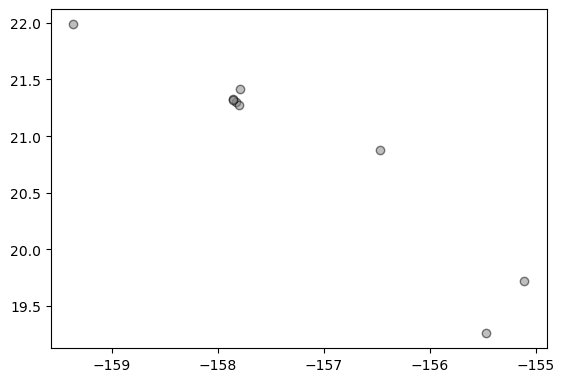

In [20]:
data88 = gpd.read_file("data/adult day care centers/Adult_Day_Health_Centers")
data88.plot(alpha=0.5, color='grey', edgecolor='black')


### Hospice Facilities Data

Downloaded from: https://geoportal.hawaii.gov/datasets/HiStateGIS::hospice-facilities-1/about

* `Description`: Locations of Hospice facilities in the State of Hawaii as of November 2021
* `Source`:   Hawaii State Department of Health Office of Health Care Assurance (OHCA)
* `Lowest Geographic Scale`: latitude,longetude
* `Data formats available`: csv, geojson, kml, shapefiled




In [21]:
data89 = pd.read_csv("data/hospice facilities/Hospice_Facilities.csv")
data89.head(3)

,X,Y,objectid,name,island,mailing_address,physical_address,phone,alt_phone,fax,poc,website,medicare,inpatient,provider_num
0,-157.863586,21.309120,1,"BRISTOL HOSPICE – HAWAII, LLC",OAHU,"55 Merchant Street, Suite 2900, Honolulu, Hawa...","55 Merchant Street, Suite 2900, Honolulu, Hawa...",(808) 536-8012,NaN,(808) 536-8013,"Tara DeMarco, Executive Director",https://bristolhospice-hawaii.com/,Yes,NaN,121508
1,-157.019800,21.090084,2,HOSPICE HAWAII-MOLOKA’I (EXTENSION UNIT),MOLOKAI,"P.O. Box 408, Kaunakakai, Hawaii 96748","28 Kamoi Street, Suite 700, Kaunakakai, Hawaii...",(808) 553-4310,NaN,(808) 553-3183,"Cathy Karras, LPN",https://www.nhpco.org/providers/hospice-hawaii...,Yes,NaN,121501
2,-156.490900,20.883006,3,HOSPICE MAUI,MAUI,"400 Mahalani Street, Wailuku, Hawaii 96793","400 Mahalani Street, Wailuku, Hawaii 96793",(808) 244-5555,NaN,(808) 244-5557,"R. Gregory Lagoy, Executive Director",https://www.hospicemaui.org/,Yes,Yes,121504


In [22]:
data90 = gpd.read_file("data/hospice facilities/Hospice_Facilities.geojson")
data90.head(3)

,objectid,name,island,mailing_address,physical_address,phone,alt_phone,fax,poc,website,medicare,inpatient,provider_num,geometry
0,1,"BRISTOL HOSPICE – HAWAII, LLC",OAHU,"55 Merchant Street, Suite 2900, Honolulu, Hawa...","55 Merchant Street, Suite 2900, Honolulu, Hawa...",(808) 536-8012,None,(808) 536-8013,"Tara DeMarco, Executive Director",https://bristolhospice-hawaii.com/,Yes,None,121508,POINT (-157.86359 21.30912)
1,2,HOSPICE HAWAII-MOLOKA’I (EXTENSION UNIT),MOLOKAI,"P.O. Box 408, Kaunakakai, Hawaii 96748","28 Kamoi Street, Suite 700, Kaunakakai, Hawaii...",(808) 553-4310,None,(808) 553-3183,"Cathy Karras, LPN",https://www.nhpco.org/providers/hospice-hawaii...,Yes,None,121501,POINT (-157.01980 21.09008)
2,3,HOSPICE MAUI,MAUI,"400 Mahalani Street, Wailuku, Hawaii 96793","400 Mahalani Street, Wailuku, Hawaii 96793",(808) 244-5555,None,(808) 244-5557,"R. Gregory Lagoy, Executive Director",https://www.hospicemaui.org/,Yes,Yes,121504,POINT (-156.49090 20.88301)


In [23]:
data91 = gpd.read_file("data/hospice facilities/Hospice_Facilities.kml")
data91.head(3)

,Name,Description,geometry
0,"BRISTOL HOSPICE – HAWAII, LLC",,POINT (-157.86359 21.30912)
1,HOSPICE HAWAII-MOLOKA’I (EXTENSION UNIT),,POINT (-157.01980 21.09008)
2,HOSPICE MAUI,,POINT (-156.49090 20.88301)


<Axes: >

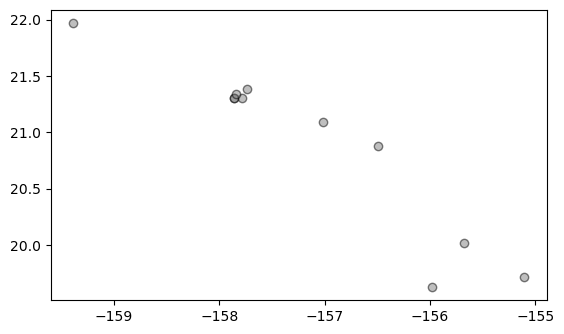

In [24]:
data92 = gpd.read_file("data/hospice facilities/Hospice_Facilities")
data92.plot(alpha=0.5, color='grey', edgecolor='black')


### Special Treatment Facilities Data

Downloaded from: https://geoportal.hawaii.gov/datasets/HiStateGIS::hospice-facilities-1/about

* `Description`: Locations of special treatment facilities in the State of Hawaii as of November 2021.
* `Source`:   Hawaii State Department of Health Office of Health Care Assurance (OHCA)
* `Lowest Geographic Scale`: latitude,longetude
* `Data formats available`: csv, geojson, kml, shapefiled

In [25]:
data93 = pd.read_csv("data/special treatment facilities/Special_Treatment_Facilities.csv")
data93.head(3)

,X,Y,objectid,name,address,city,zipcode,island,phone_numb,license_ex,license_nu
0,-156.341709,20.885036,1,"Aloha House, Inc.",4593 Ike Drive,Makawao,96768,Maui,8085798414,2022/05/31 00:00:00+00,28-STF
1,-157.952037,21.416601,2,"Benchmark Behavioral Health System, Inc",2501 Waimano Home Road,Pearl City,96782,Oahu,8084541411,2022/01/31 00:00:00+00,69-STF
2,-157.954317,21.678708,3,Bobby Benson Center,56-660 Kamehameha Highway,Kahuku,96731,Oahu,8082937555,2022/10/31 00:00:00+00,53-STF


In [26]:
data94 = gpd.read_file("data/special treatment facilities/Special_Treatment_Facilities.geojson")
data94.head(3)

,objectid,name,address,city,zipcode,island,phone_numb,license_ex,license_nu,geometry
0,1,"Aloha House, Inc.",4593 Ike Drive,Makawao,96768,Maui,8085798414,2022-05-31 00:00:00+00:00,28-STF,POINT (-156.34171 20.88504)
1,2,"Benchmark Behavioral Health System, Inc",2501 Waimano Home Road,Pearl City,96782,Oahu,8084541411,2022-01-31 00:00:00+00:00,69-STF,POINT (-157.95204 21.41660)
2,3,Bobby Benson Center,56-660 Kamehameha Highway,Kahuku,96731,Oahu,8082937555,2022-10-31 00:00:00+00:00,53-STF,POINT (-157.95432 21.67871)


In [27]:
data95 = gpd.read_file("data/special treatment facilities/Special_Treatment_Facilities.kml")
data95.head(3)

,Name,Description,geometry
0,"Aloha House, Inc.",,POINT (-156.34171 20.88504)
1,"Benchmark Behavioral Health System, Inc",,POINT (-157.95204 21.41660)
2,Bobby Benson Center,,POINT (-157.95432 21.67871)


<Axes: >

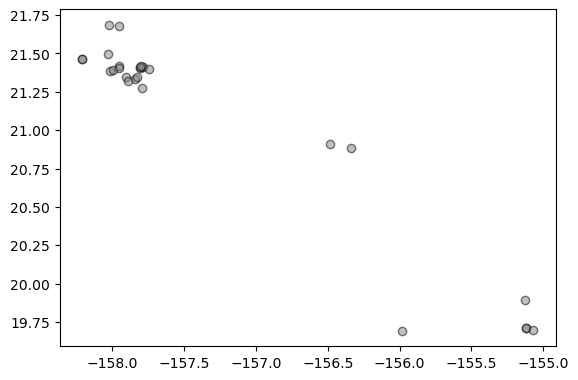

In [28]:
data96 = gpd.read_file("data/special treatment facilities/Special_Treatment_Facilities")
data96.plot(alpha=0.5, color='grey', edgecolor='black')

### Allocation of industry for the civilian population 16 years and older (by sex)

Downloaded from: https://data.census.gov/table/ACSDT5Y2022.B99241?t=Industry&g=040XX00US15$1500000

* `Description`: IMPUTATION OF INDUSTRY FOR THE CIVILIAN EMPLOYED POPULATION 16 YEARS AND OVER.
* `Source`: ACS US Census Bereau
* `Lowest Geographic Scale`: Geo_ID
* `Data formats available`: csv

```
Column Name	Label
GEO_ID	Geography
NAME	Geographic Area Name
B99241_001E	Estimate!!Total
B99241_002E	Estimate!!Total!!Imputed
B99241_003E	Estimate!!Total!!Not Imputed![image.png](attachment:image.png)
```

In [6]:
#2013
data97 = pd.read_csv("data/Allocation of industry for the civilian population 16 years and older (by sex)/ACSDT5Y2013.B99241-Data.csv")
data97.head(3)

,GEO_ID,NAME,B99241_001E,B99241_002E,B99241_003E,Unnamed: 5
0,Geography,Geographic Area Name,Estimate!!Total,Estimate!!Total!!Imputed,Estimate!!Total!!Not Imputed,NaN
1,1500000US150010201001,"Block Group 1, Census Tract 201, Hawaii County...",747,48,699,NaN
2,1500000US150010201002,"Block Group 2, Census Tract 201, Hawaii County...",466,7,459,NaN


In [7]:
#2014
data98 = pd.read_csv("data/Allocation of industry for the civilian population 16 years and older (by sex)/ACSDT5Y2014.B99241-Data.csv")
data98.head(3)

,GEO_ID,NAME,B99241_001E,B99241_002E,B99241_003E,Unnamed: 5
0,Geography,Geographic Area Name,Estimate!!Total,Estimate!!Total!!Imputed,Estimate!!Total!!Not Imputed,NaN
1,1500000US150010201001,"Block Group 1, Census Tract 201, Hawaii County...",620,27,593,NaN
2,1500000US150010201002,"Block Group 2, Census Tract 201, Hawaii County...",372,7,365,NaN


In [8]:
#2015
data99 = pd.read_csv("data/Allocation of industry for the civilian population 16 years and older (by sex)/ACSDT5Y2015.B99241-Data.csv")
data99.head(3)

,GEO_ID,NAME,B99241_001E,B99241_002E,B99241_003E,Unnamed: 5
0,Geography,Geographic Area Name,Estimate!!Total,Estimate!!Total!!Imputed,Estimate!!Total!!Not Imputed,NaN
1,1500000US150010201001,"Block Group 1, Census Tract 201, Hawaii County...",639,21,618,NaN
2,1500000US150010201002,"Block Group 2, Census Tract 201, Hawaii County...",395,5,390,NaN


In [9]:
#2016
data100 = pd.read_csv("data/Allocation of industry for the civilian population 16 years and older (by sex)/ACSDT5Y2016.B99241-Data.csv")
data100.head(3)

,GEO_ID,NAME,B99241_001E,B99241_002E,B99241_003E,Unnamed: 5
0,Geography,Geographic Area Name,Estimate!!Total,Estimate!!Total!!Allocated,Estimate!!Total!!Not Allocated,NaN
1,1500000US150010201001,"Block Group 1, Census Tract 201, Hawaii County...",653,20,633,NaN
2,1500000US150010201002,"Block Group 2, Census Tract 201, Hawaii County...",417,6,411,NaN


In [10]:
#2017
data101 = pd.read_csv("data/Allocation of industry for the civilian population 16 years and older (by sex)/ACSDT5Y2017.B99241-Data.csv")
data101.head(3)

,GEO_ID,NAME,B99241_001E,B99241_002E,B99241_003E,Unnamed: 5
0,Geography,Geographic Area Name,Estimate!!Total,Estimate!!Total!!Allocated,Estimate!!Total!!Not Allocated,NaN
1,1500000US150010201001,"Block Group 1, Census Tract 201, Hawaii County...",618,22,596,NaN
2,1500000US150010201002,"Block Group 2, Census Tract 201, Hawaii County...",412,3,409,NaN


In [11]:
#2018
data102 = pd.read_csv("data/Allocation of industry for the civilian population 16 years and older (by sex)/ACSDT5Y2018.B99241-Data.csv")
data102.head(3)

,GEO_ID,NAME,B99241_001E,B99241_002E,B99241_003E,Unnamed: 5
0,Geography,Geographic Area Name,Estimate!!Total,Estimate!!Total!!Allocated,Estimate!!Total!!Not Allocated,NaN
1,1500000US150010201001,"Block Group 1, Census Tract 201, Hawaii County...",741,25,716,NaN
2,1500000US150010201002,"Block Group 2, Census Tract 201, Hawaii County...",378,0,378,NaN


In [12]:
#2019
data103 = pd.read_csv("data/Allocation of industry for the civilian population 16 years and older (by sex)/ACSDT5Y2019.B99241-Data.csv")
data103.head(3)

,GEO_ID,NAME,B99241_001E,B99241_002E,B99241_003E,Unnamed: 5
0,Geography,Geographic Area Name,Estimate!!Total:,Estimate!!Total:!!Allocated,Estimate!!Total:!!Not Allocated,NaN
1,1500000US150010201001,"Block Group 1, Census Tract 201, Hawaii County...",802,62,740,NaN
2,1500000US150010201002,"Block Group 2, Census Tract 201, Hawaii County...",416,0,416,NaN


In [13]:
#2020
data104 = pd.read_csv("data/Allocation of industry for the civilian population 16 years and older (by sex)/ACSDT5Y2020.B99241-Data.csv")
data104.head(3)

,GEO_ID,NAME,B99241_001E,B99241_002E,B99241_003E,Unnamed: 5
0,Geography,Geographic Area Name,Estimate!!Total:,Estimate!!Total:!!Allocated,Estimate!!Total:!!Not Allocated,NaN
1,1500000US150010201001,"Block Group 1, Census Tract 201, Hawaii County...",657,11,646,NaN
2,1500000US150010201002,"Block Group 2, Census Tract 201, Hawaii County...",323,0,323,NaN


### GROUP QUARTERS POPULATION BY MAJOR GROUP QUARTERS TYPE

Downloaded from: https://data.census.gov/cedsci/table?g=0400000US15%241000000&y=2020&tid=DECENNIALPL2020.P5

* `Description`: GROUP QUARTERS POPULATION BY MAJOR GROUP QUARTERS TYPE
* `Source`: U.S. Census Bureau
* `Lowest Geographic Scale`: Geo_ID
* `Data formats available`: csv

```
Column Name	Label
GEO_ID	Geography
NAME	Geographic Area Name
P5_001N	 !!Total:
P5_002N	 !!Total:!!Institutionalized population:
P5_003N	 !!Total:!!Institutionalized population:!!Correctional facilities for adults
P5_004N	 !!Total:!!Institutionalized population:!!Juvenile facilities
P5_005N	 !!Total:!!Institutionalized population:!!Nursing facilities/Skilled-nursing facilities
P5_006N	 !!Total:!!Institutionalized population:!!Other institutional facilities
P5_007N	 !!Total:!!Noninstitutionalized population:
P5_008N	 !!Total:!!Noninstitutionalized population:!!College/University student housing
P5_009N	 !!Total:!!Noninstitutionalized population:!!Military quarters
P5_010N	 !!Total:!!Noninstitutionalized population:!!Other noninstitutional facilities
```

In [14]:
data105 = pd.read_csv("data/population in group quarters/DECENNIALPL2020.P5-Data.csv")
data105.head(3)

,GEO_ID,NAME,P5_001N,P5_002N,P5_003N,P5_004N,P5_005N,P5_006N,P5_007N,P5_008N,P5_009N,P5_010N,Unnamed: 12
0,Geography,Geographic Area Name,!!Total:,!!Total:!!Institutionalized population:,!!Total:!!Institutionalized population:!!Corr...,!!Total:!!Institutionalized population:!!Juve...,!!Total:!!Institutionalized population:!!Nurs...,!!Total:!!Institutionalized population:!!Othe...,!!Total:!!Noninstitutionalized population:,!!Total:!!Noninstitutionalized population:!!C...,!!Total:!!Noninstitutionalized population:!!M...,!!Total:!!Noninstitutionalized population:!!O...,NaN
1,1000000US150010201001000,"Block 1000, Block Group 1, Census Tract 201, H...",0,0,0,0,0,0,0,0,0,0,NaN
2,1000000US150010201001001,"Block 1001, Block Group 1, Census Tract 201, H...",0,0,0,0,0,0,0,0,0,0,NaN


### Persons in Poverty, Percent

Downloaded from: https://www.census.gov/quickfacts/fact/table/easthonolulucdphawaii,HI,US/PST045221
* `Description`: Quick Facts, East Honolulu CDP, Hawaii; Hawaii; United States
* `Source`: U.S. Census Bureau
* `Lowest Geographic Scale`: 
* `Data formats available`: csv

```
East Honolulu CDP, Hawaii	
Value Note for East Honolulu CDP, Hawaii	
Hawaii	
Value Note for Hawaii	
United States	
Value Note for United States
```

In [15]:
data106 = pd.read_csv("data/persons in poverty percent/QuickFacts Jan-23-2024.csv")
data106.head(3)

,Fact,Fact Note,"East Honolulu CDP, Hawaii","Value Note for East Honolulu CDP, Hawaii",Hawaii,Value Note for Hawaii,United States,Value Note for United States
0,"Population estimates, July 1, 2023, (V2023)",NaN,X,NaN,"1,435,138",NaN,"334,914,895",NaN
1,"Population Estimates, July 1, 2022, (V2022)",NaN,X,NaN,"1,439,399",NaN,"333,271,411",NaN
2,"Population estimates base, April 1, 2020, (V2023)",NaN,X,NaN,"1,455,274",NaN,"331,464,948",NaN


### Therapeutic Living Program Facilities

Downloaded from: https://geoportal.hawaii.gov/datasets/HiStateGIS::therapeutic-living-program-facilities/about

* `Description`: Locations of therapeutic living program facilities in the State of Hawaii as of November 2021.
* `Source`:   Hawaii State Department of Health Office of Health Care Assurance (OHCA)
* `Lowest Geographic Scale`: latitude,longetude
* `Data formats available`: csv, geojson, kml, shapefiled




In [16]:
data107 = pd.read_csv("data/therapeutic living program facilities/Therapeutic_Living_Program_Facilities.csv")
data107.head(3)

,X,Y,objectid,name,address,city,zipcode,island,phone,license_ex,license_nu
0,-155.069250,19.687283,1,Big Island Substance Abuse Council (Kinoole),2093 Kinoole Street,Hilo,96720,Big Island,8089699994,2022/02/28 00:00:00+00,37-TLP
1,-155.109186,19.711546,2,Big Island Substance Abuse Council (Laukona),136 Laukona Street,Hilo,96720,Big Island,8089699994,2022/02/28 00:00:00+00,42-TLP
2,-155.125097,19.711674,3,East Hawaii Men's TLP,1151 Heauka Place,Hilo,96720,Big Island,8089699994,2022/02/28 00:00:00+00,47-TLP


In [17]:
data108 = gpd.read_file("data/therapeutic living program facilities/Therapeutic_Living_Program_Facilities.geojson")
data108.head(3)

,objectid,name,address,city,zipcode,island,phone,license_ex,license_nu,geometry
0,1,Big Island Substance Abuse Council (Kinoole),2093 Kinoole Street,Hilo,96720,Big Island,8089699994,2022-02-28 00:00:00+00:00,37-TLP,POINT (-155.06925 19.68728)
1,2,Big Island Substance Abuse Council (Laukona),136 Laukona Street,Hilo,96720,Big Island,8089699994,2022-02-28 00:00:00+00:00,42-TLP,POINT (-155.10919 19.71155)
2,3,East Hawaii Men's TLP,1151 Heauka Place,Hilo,96720,Big Island,8089699994,2022-02-28 00:00:00+00:00,47-TLP,POINT (-155.12510 19.71167)


In [18]:
data109 = gpd.read_file("data/therapeutic living program facilities/Therapeutic_Living_Program_Facilities.kml")
data109.head(3)

,Name,Description,geometry
0,Big Island Substance Abuse Council (Kinoole),,POINT (-155.06925 19.68728)
1,Big Island Substance Abuse Council (Laukona),,POINT (-155.10919 19.71155)
2,East Hawaii Men's TLP,,POINT (-155.12510 19.71167)


<Axes: >

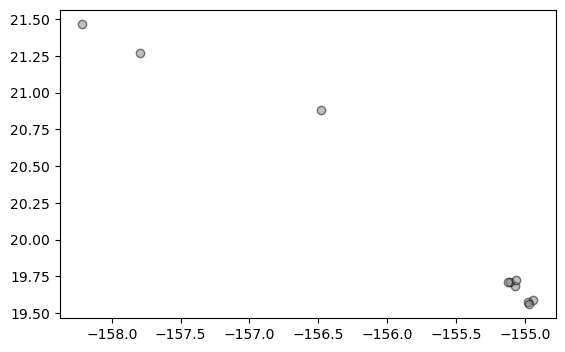

In [19]:
data110 = gpd.read_file("data/therapeutic living program facilities/Therapeutic_Living_Program_Facilities")
data110.plot(alpha=0.5, color='grey', edgecolor='black')